In [64]:
import pandas as pd
import yfinance as yf

tickers=['AGRO.BA','ALUA.BA','AUSO.BA','BBAR.BA','BHIP.BA','BMA.BA',
         'BOLT.BA','BPAT.BA','BRIO.BA','BYMA.BA','CADO.BA','CAPX.BA',
         'CARC.BA','CECO2.BA','CELU.BA','CEPU.BA','CGPA2.BA','COME.BA',
         'CRES.BA','CTIO.BA','CVH.BA','DGCU2.BA','EDN.BA','FERR.BA',
         'GAMI.BA','GARO.BA','GCLA.BA','GGAL.BA','GRIM.BA','HARG.BA','HAVA.BA',
         'INAG.BA','INTR.BA','INVJ.BA','IRCP.BA','IRSA.BA','LOMA.BA','LEDE.BA',
         'LONG.BA','METR.BA','MIRG.BA','MOLA.BA','MOLI.BA','MORI.BA',
         'OEST.BA','PAMP.BA','PATA.BA','ROSE.BA','SAMI.BA','SEMI.BA',
         'SUPV.BA','TECO2.BA','TGNO4.BA','TGSU2.BA','TRAN.BA','TXAR.BA','YPFD.BA']

tickers_str=" ".join(tickers)
market=yf.Tickers(tickers_str)

market_df = market.history(period="1y")
market_df.head()

[*********************100%%**********************]  57 of 57 completed


Price      Capital Gains               Close                                   \
Ticker           BRIO.BA IRCP.BA     AGRO.BA     ALUA.BA AUSO.BA      BBAR.BA   
Date                                                                            
2023-09-04           0.0     0.0  119.047623  601.890991  1067.0  1182.660400   
2023-09-05           0.0     0.0  112.380951  579.395081  1011.0  1116.513794   
2023-09-06           0.0     0.0  113.333336  585.893860  1049.0  1099.126587   
2023-09-07           0.0     0.0  107.380951  560.398499   986.5  1028.318115   
2023-09-08           0.0     0.0  109.047623  564.397766   902.0   953.435974   

Price                                                   ...  Volume          \
Ticker        BHIP.BA       BMA.BA BOLT.BA     BPAT.BA  ... ROSE.BA SAMI.BA   
Date                                                    ...                   
2023-09-04  43.599552  1798.034180   16.50  322.543671  ...  5264.0   41945   
2023-09-05  41.549999  1690.479736   15.10  318.408508  ...     0.0   42491   
2023-09-06  41.223934  1626.699097   15.40  316.570679  ...  6630.0   33924   
2023-09-07  39.360706  1522.098755   14.80  306.462463  ...   200.0   36376   
2023-09-08  36.239799  1446.636108   14.75  285.786591  ...   200.0   23772   

Price                                                                    \
Ticker      SEMI.BA SUPV.BA TECO2.BA TGNO4.BA TGSU2.BA TRAN.BA  TXAR.BA   
Date                                                                      
2023-09-04   838521   72433    71684   147641    64809  267621   227875   
2023-09-05   941064  109455    90653   186945   281964  450852   739092   
2023-09-06   819150  159331    75904   178619   181432  279698   749909   
2023-09-07  1622926  795634   107414   246325   303234  332812  1081426   
2023-09-08  1006745  963717   241968   298735   367350  419761   526742   

Price               
Ticker     YPFD.BA  
Date                
2023-09-04  100286  
2023-09-05  311569  
2023-09-06  217827  
2023-09-07  349040  
2023-09-08  511794  

[5 rows x 401 columns]

In [65]:

print("Features per ticker: " ,set([i[0] for i in list(market_df.columns)]))
print("Amount of tickers: ", len(set([i[1] for i in list(market_df.columns)])))


Features per ticker:  {'High', 'Close', 'Open', 'Volume', 'Dividends', 'Stock Splits', 'Low', 'Capital Gains'}
Amount of tickers:  57


In [66]:
market_volume = market_df.Volume
market_volume.isnull().sum()

Ticker
AGRO.BA     0
ALUA.BA     0
AUSO.BA     0
BBAR.BA     0
BHIP.BA     0
BMA.BA      0
BOLT.BA     0
BPAT.BA     0
BRIO.BA     1
BYMA.BA     0
CADO.BA     0
CAPX.BA     0
CARC.BA     0
CECO2.BA    0
CELU.BA     0
CEPU.BA     0
CGPA2.BA    0
COME.BA     0
CRES.BA     0
CTIO.BA     0
CVH.BA      0
DGCU2.BA    0
EDN.BA      0
FERR.BA     0
GAMI.BA     0
GARO.BA     1
GCLA.BA     0
GGAL.BA     0
GRIM.BA     1
HARG.BA     0
HAVA.BA     0
INAG.BA     1
INTR.BA     0
INVJ.BA     0
IRCP.BA     1
IRSA.BA     0
LEDE.BA     0
LOMA.BA     0
LONG.BA     0
METR.BA     0
MIRG.BA     0
MOLA.BA     0
MOLI.BA     0
MORI.BA     0
OEST.BA     0
PAMP.BA     0
PATA.BA     0
ROSE.BA     1
SAMI.BA     0
SEMI.BA     0
SUPV.BA     0
TECO2.BA    0
TGNO4.BA    0
TGSU2.BA    0
TRAN.BA     0
TXAR.BA     0
YPFD.BA     0
dtype: int64

In [67]:
print("Column full of 0: ",any(market_volume.sum() == 0 ))
print("Row full of 0: " ,any(market_volume.transpose().sum() == 0 ))


Column full of 0:  True
Row full of 0:  False


In [68]:
#Removing columns full o 0
market_volume= market_volume.transpose()[market_volume.sum() != 0].transpose()
print("Column full of 0: ",any(market_volume.sum() == 0 ))

Column full of 0:  False


<Axes: title={'center': 'One year total volume'}, ylabel='Ticker'>

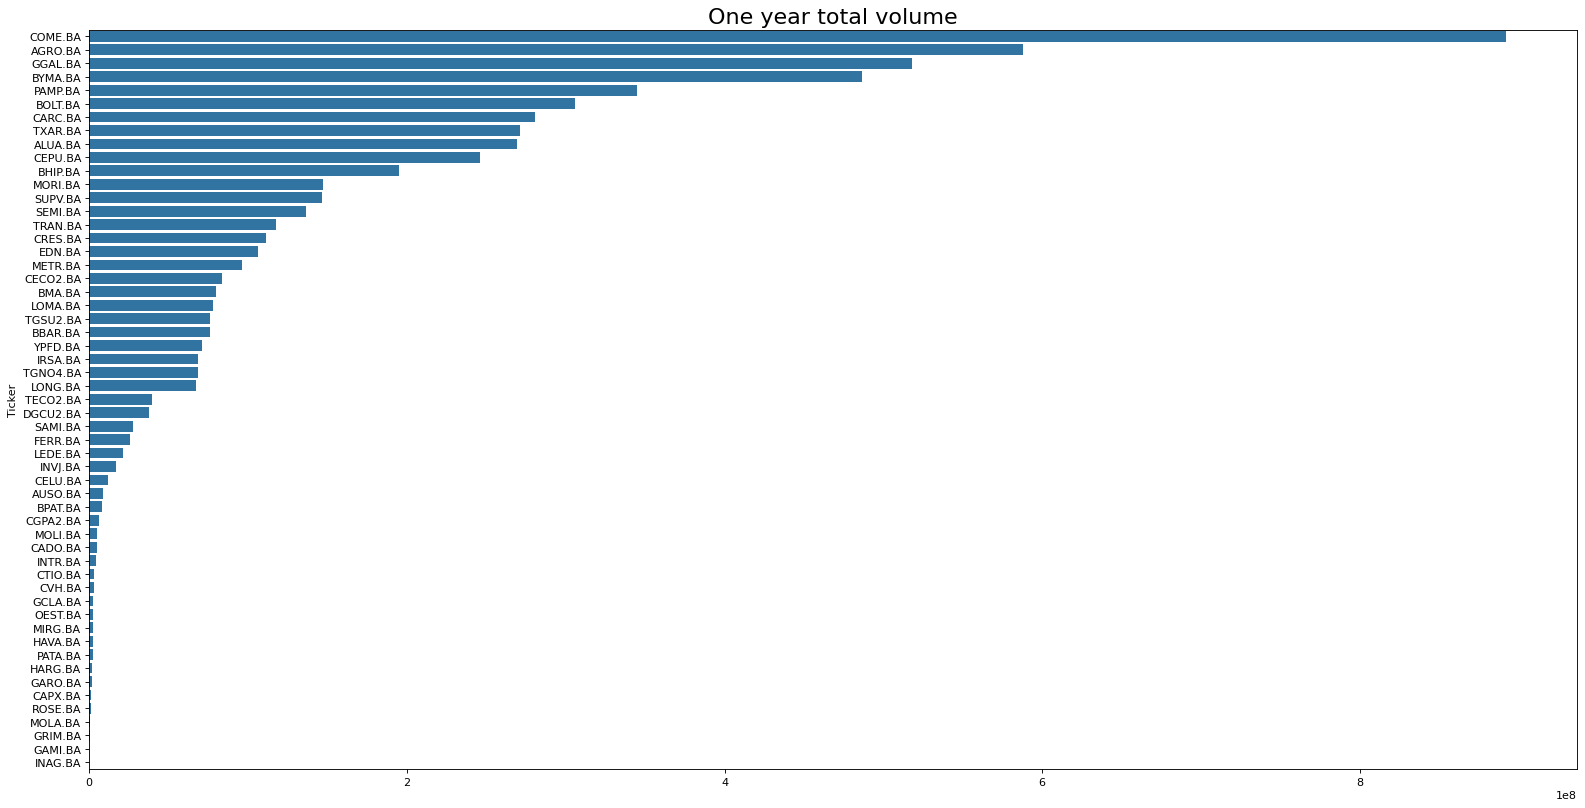

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

market_volume_total = market_volume.sum().sort_values(ascending= False)
plt.figure(figsize=(24, 12), dpi=80)
plt.title("One year total volume" , fontsize=20)
sns.barplot(market_volume_total , orient="h")


C:\Users\PC1\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


[[<Axes: title={'center': 'AGRO.BA'}> <Axes: title={'center': 'ALUA.BA'}>
  <Axes: title={'center': 'AUSO.BA'}>]
 [<Axes: title={'center': 'BBAR.BA'}> <Axes: title={'center': 'BHIP.BA'}>
  <Axes: title={'center': 'BMA.BA'}>]
 [<Axes: title={'center': 'BOLT.BA'}> <Axes: title={'center': 'BPAT.BA'}>
  <Axes: title={'center': 'BYMA.BA'}>]
 [<Axes: title={'center': 'CADO.BA'}> <Axes: title={'center': 'CAPX.BA'}>
  <Axes: >]]
[[<Axes: title={'center': 'CARC.BA'}>
  <Axes: title={'center': 'CECO2.BA'}>
  <Axes: title={'center': 'CELU.BA'}>]
 [<Axes: title={'center': 'CEPU.BA'}>
  <Axes: title={'center': 'CGPA2.BA'}>
  <Axes: title={'center': 'COME.BA'}>]
 [<Axes: title={'center': 'CRES.BA'}> <Axes: title={'center': 'CTIO.BA'}>
  <Axes: title={'center': 'CVH.BA'}>]
 [<Axes: title={'center': 'DGCU2.BA'}> <Axes: title={'center': 'EDN.BA'}>
  <Axes: >]]
[[<Axes: title={'center': 'FERR.BA'}> <Axes: title={'center': 'GAMI.BA'}>
  <Axes: title={'center': 'GARO.BA'}>]
 [<Axes: title={'center': 'GCLA

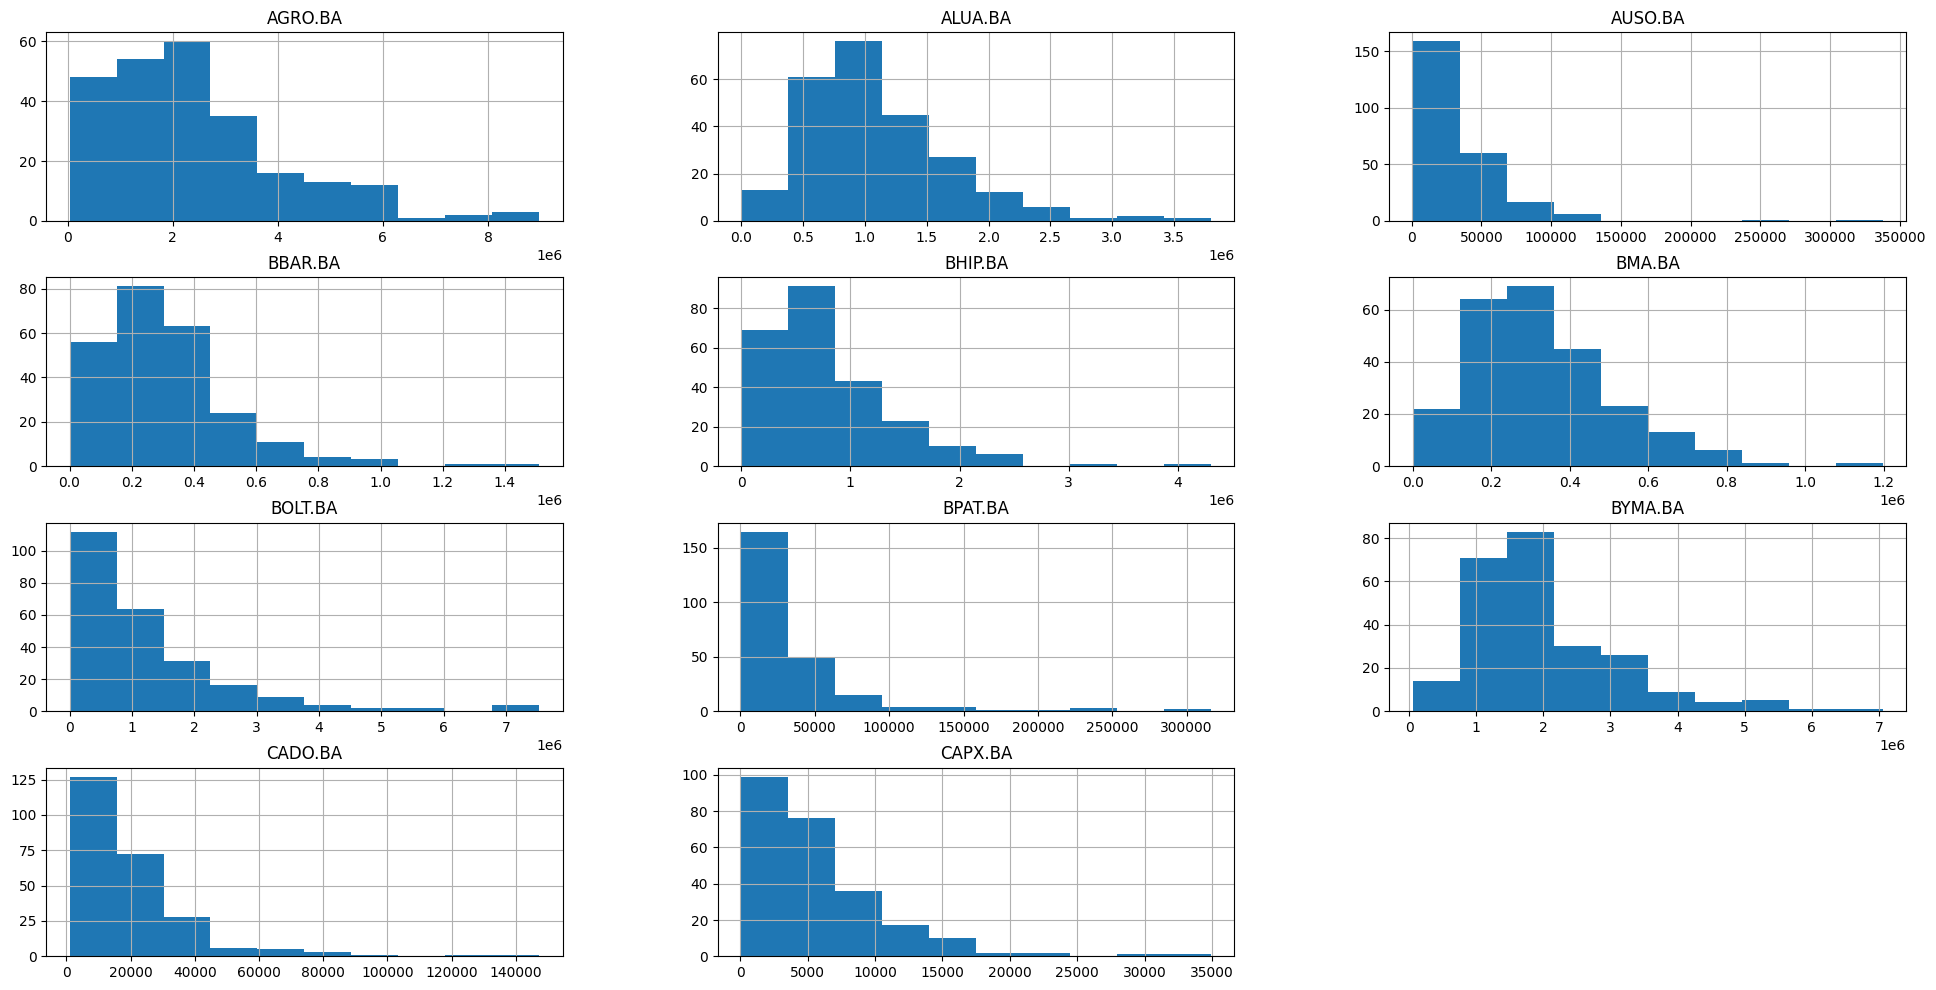

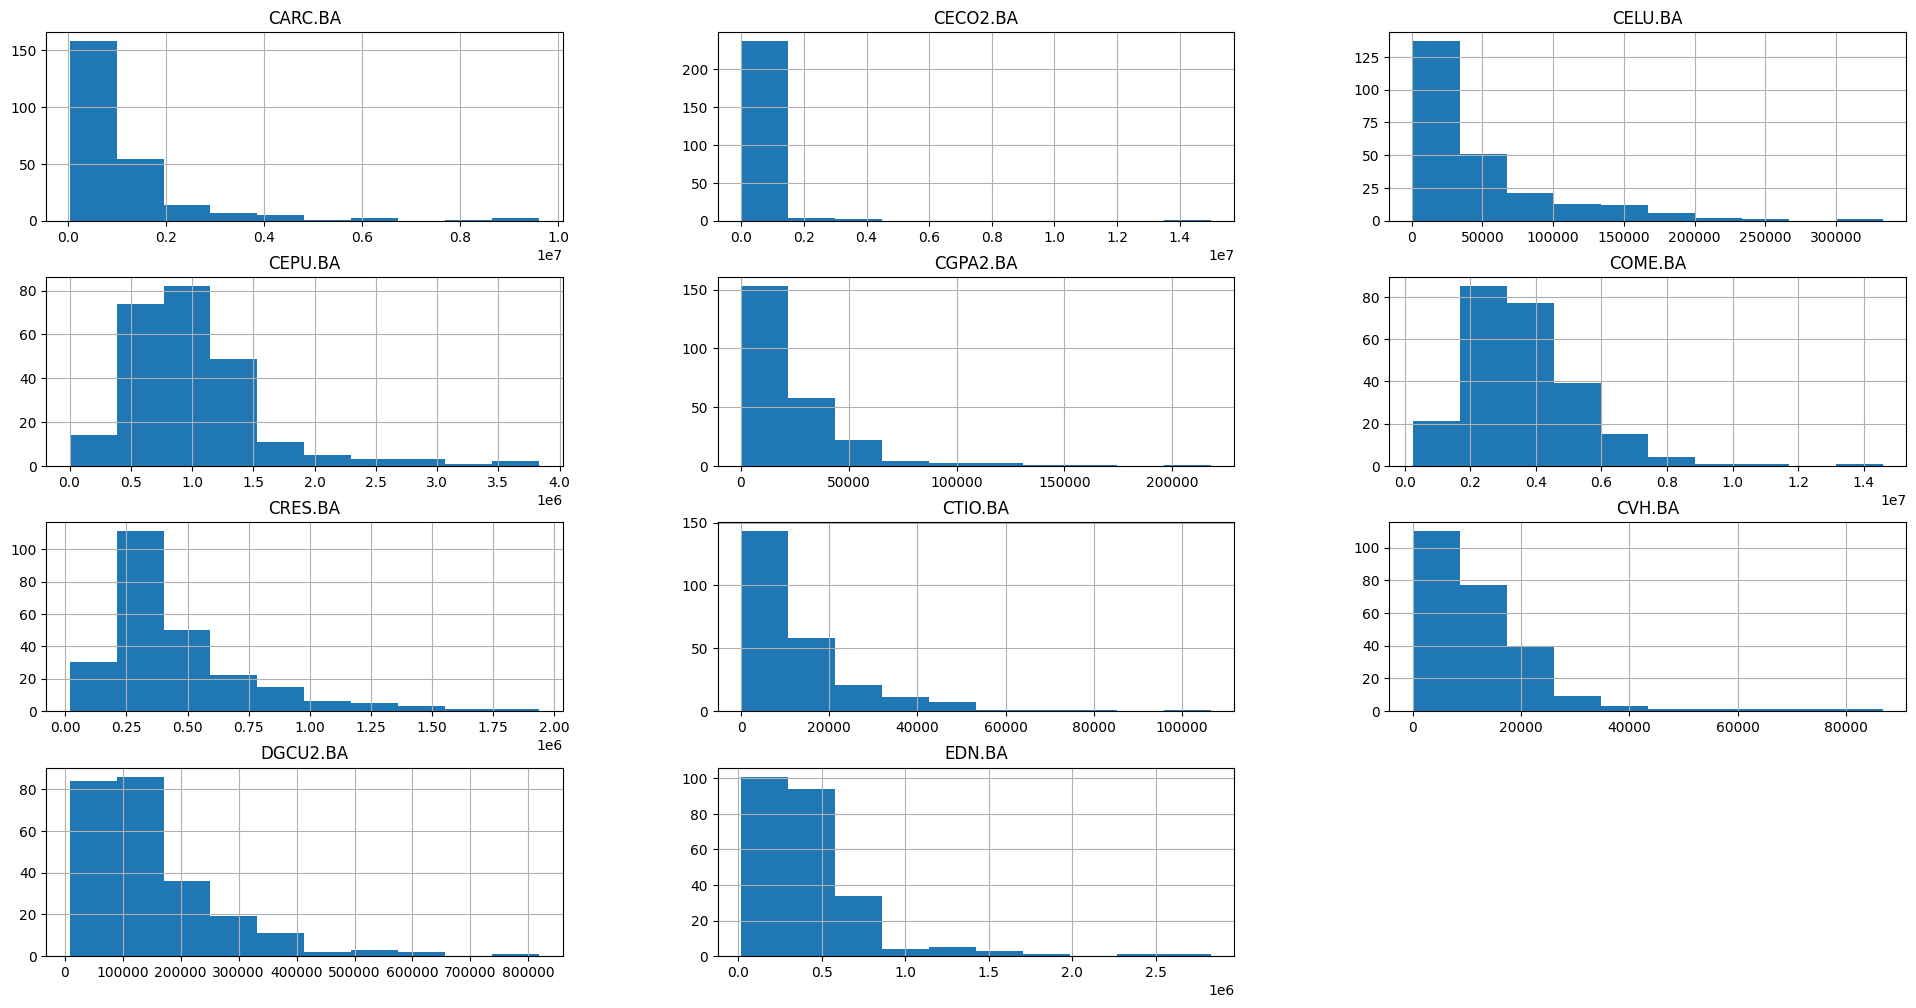

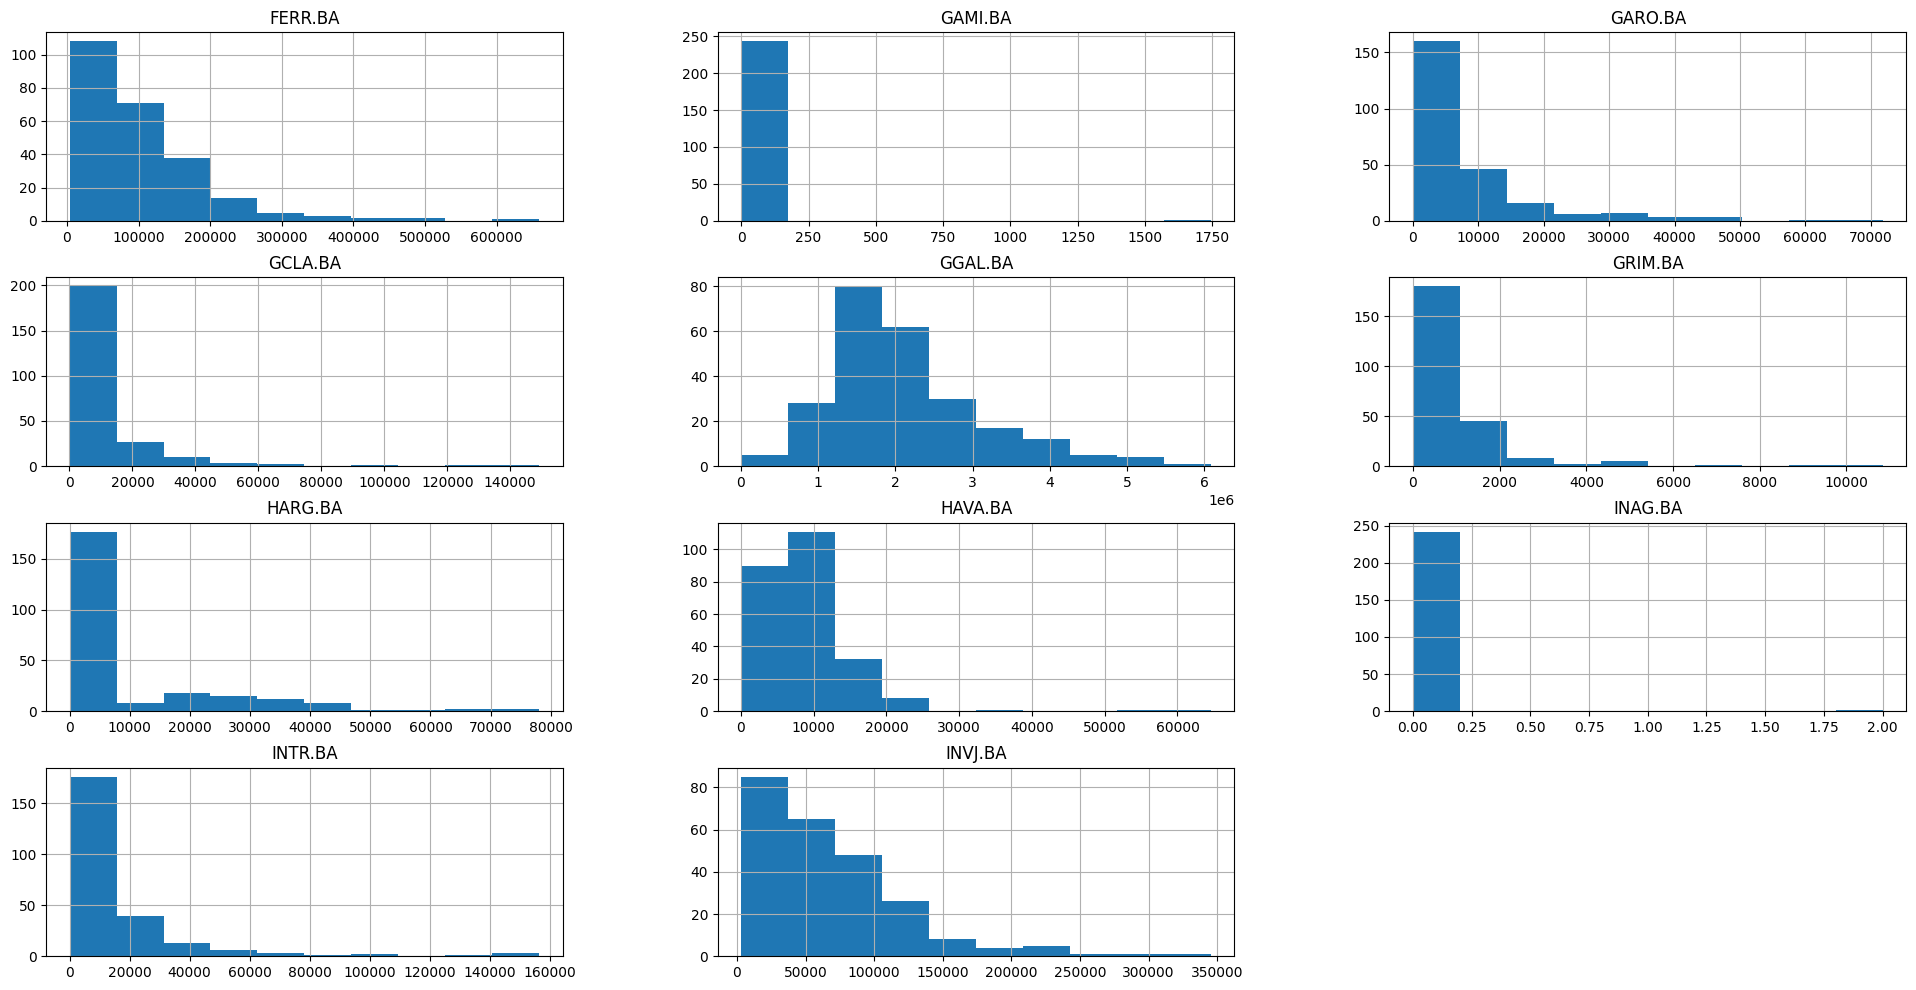

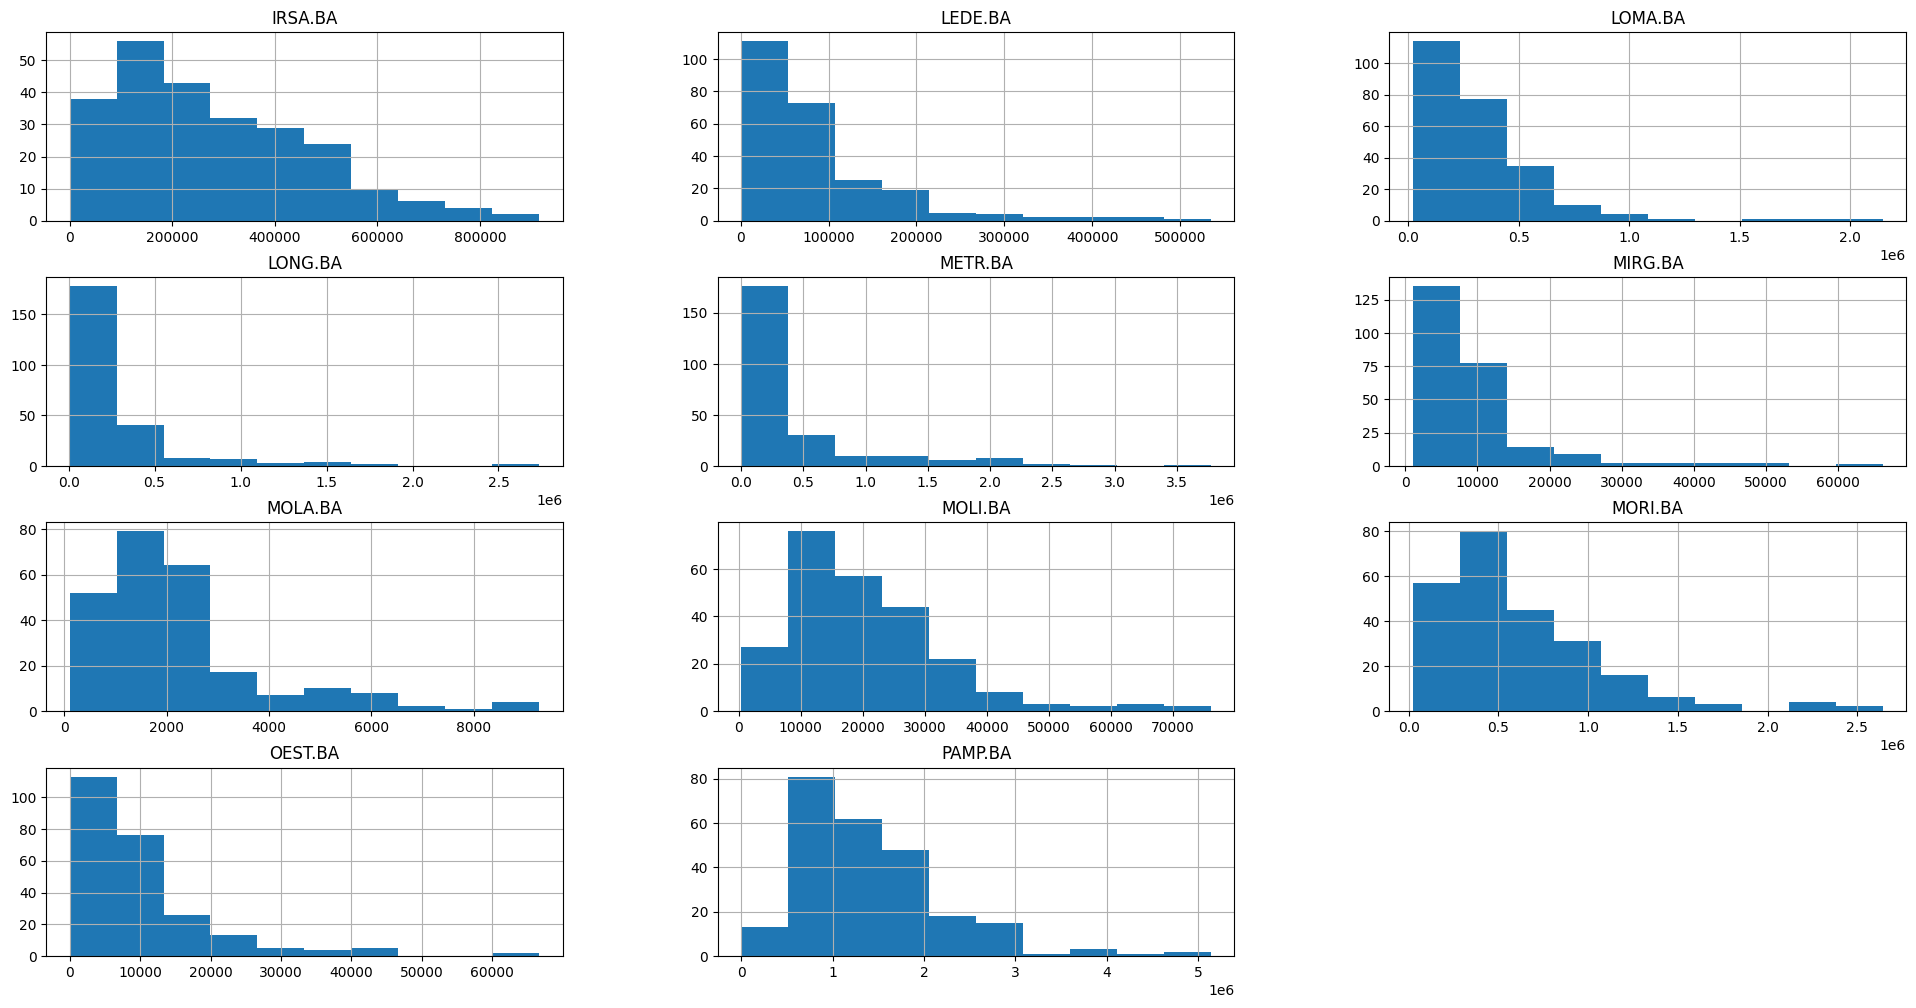

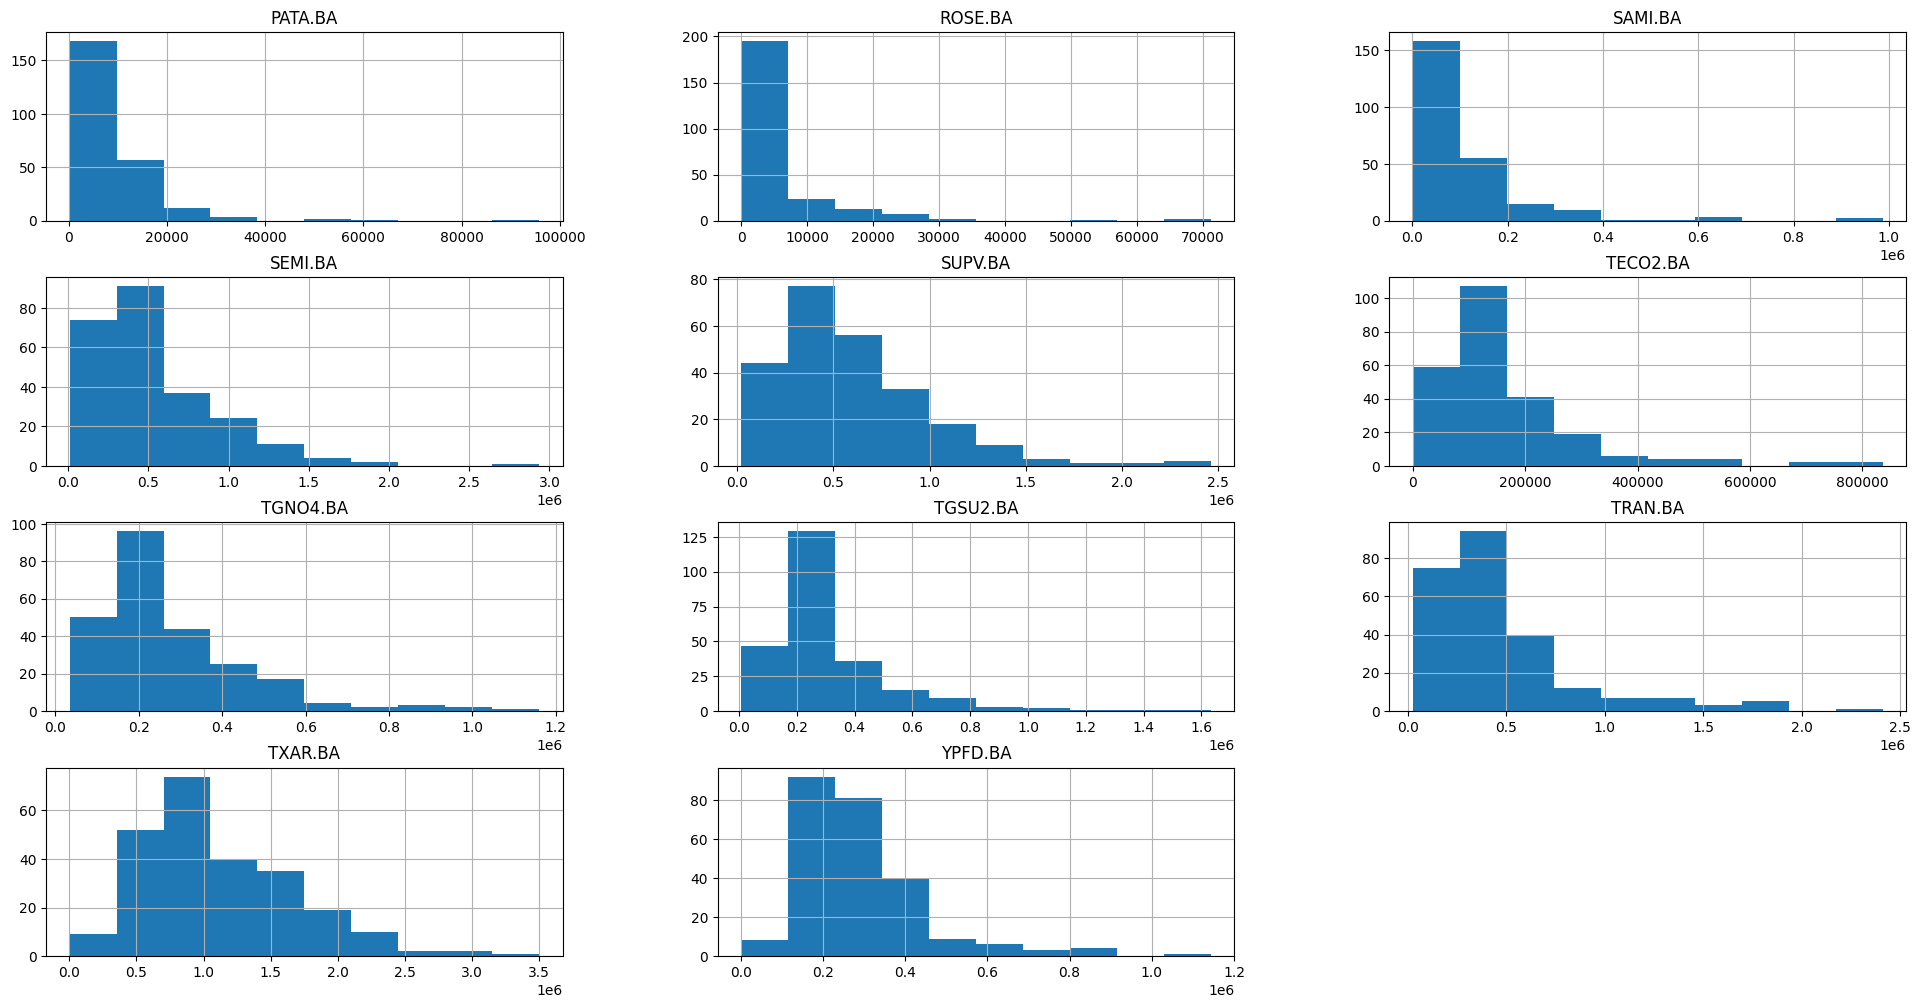

In [70]:
#Distributions of volumes per day
import numpy as np

market_volume_split = np.array_split(market_volume.transpose(), 5)

for i in range(0,5):
       df = pd.DataFrame(market_volume_split[i].transpose())
       print(df.hist(figsize=(24,12)))

C:\Users\PC1\AppData\Local\Temp\ipykernel_9880\806472709.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_volume_corr = market_volume.pct_change().corr()


<Axes: title={'center': 'Correlations'}, xlabel='Ticker', ylabel='Ticker'>

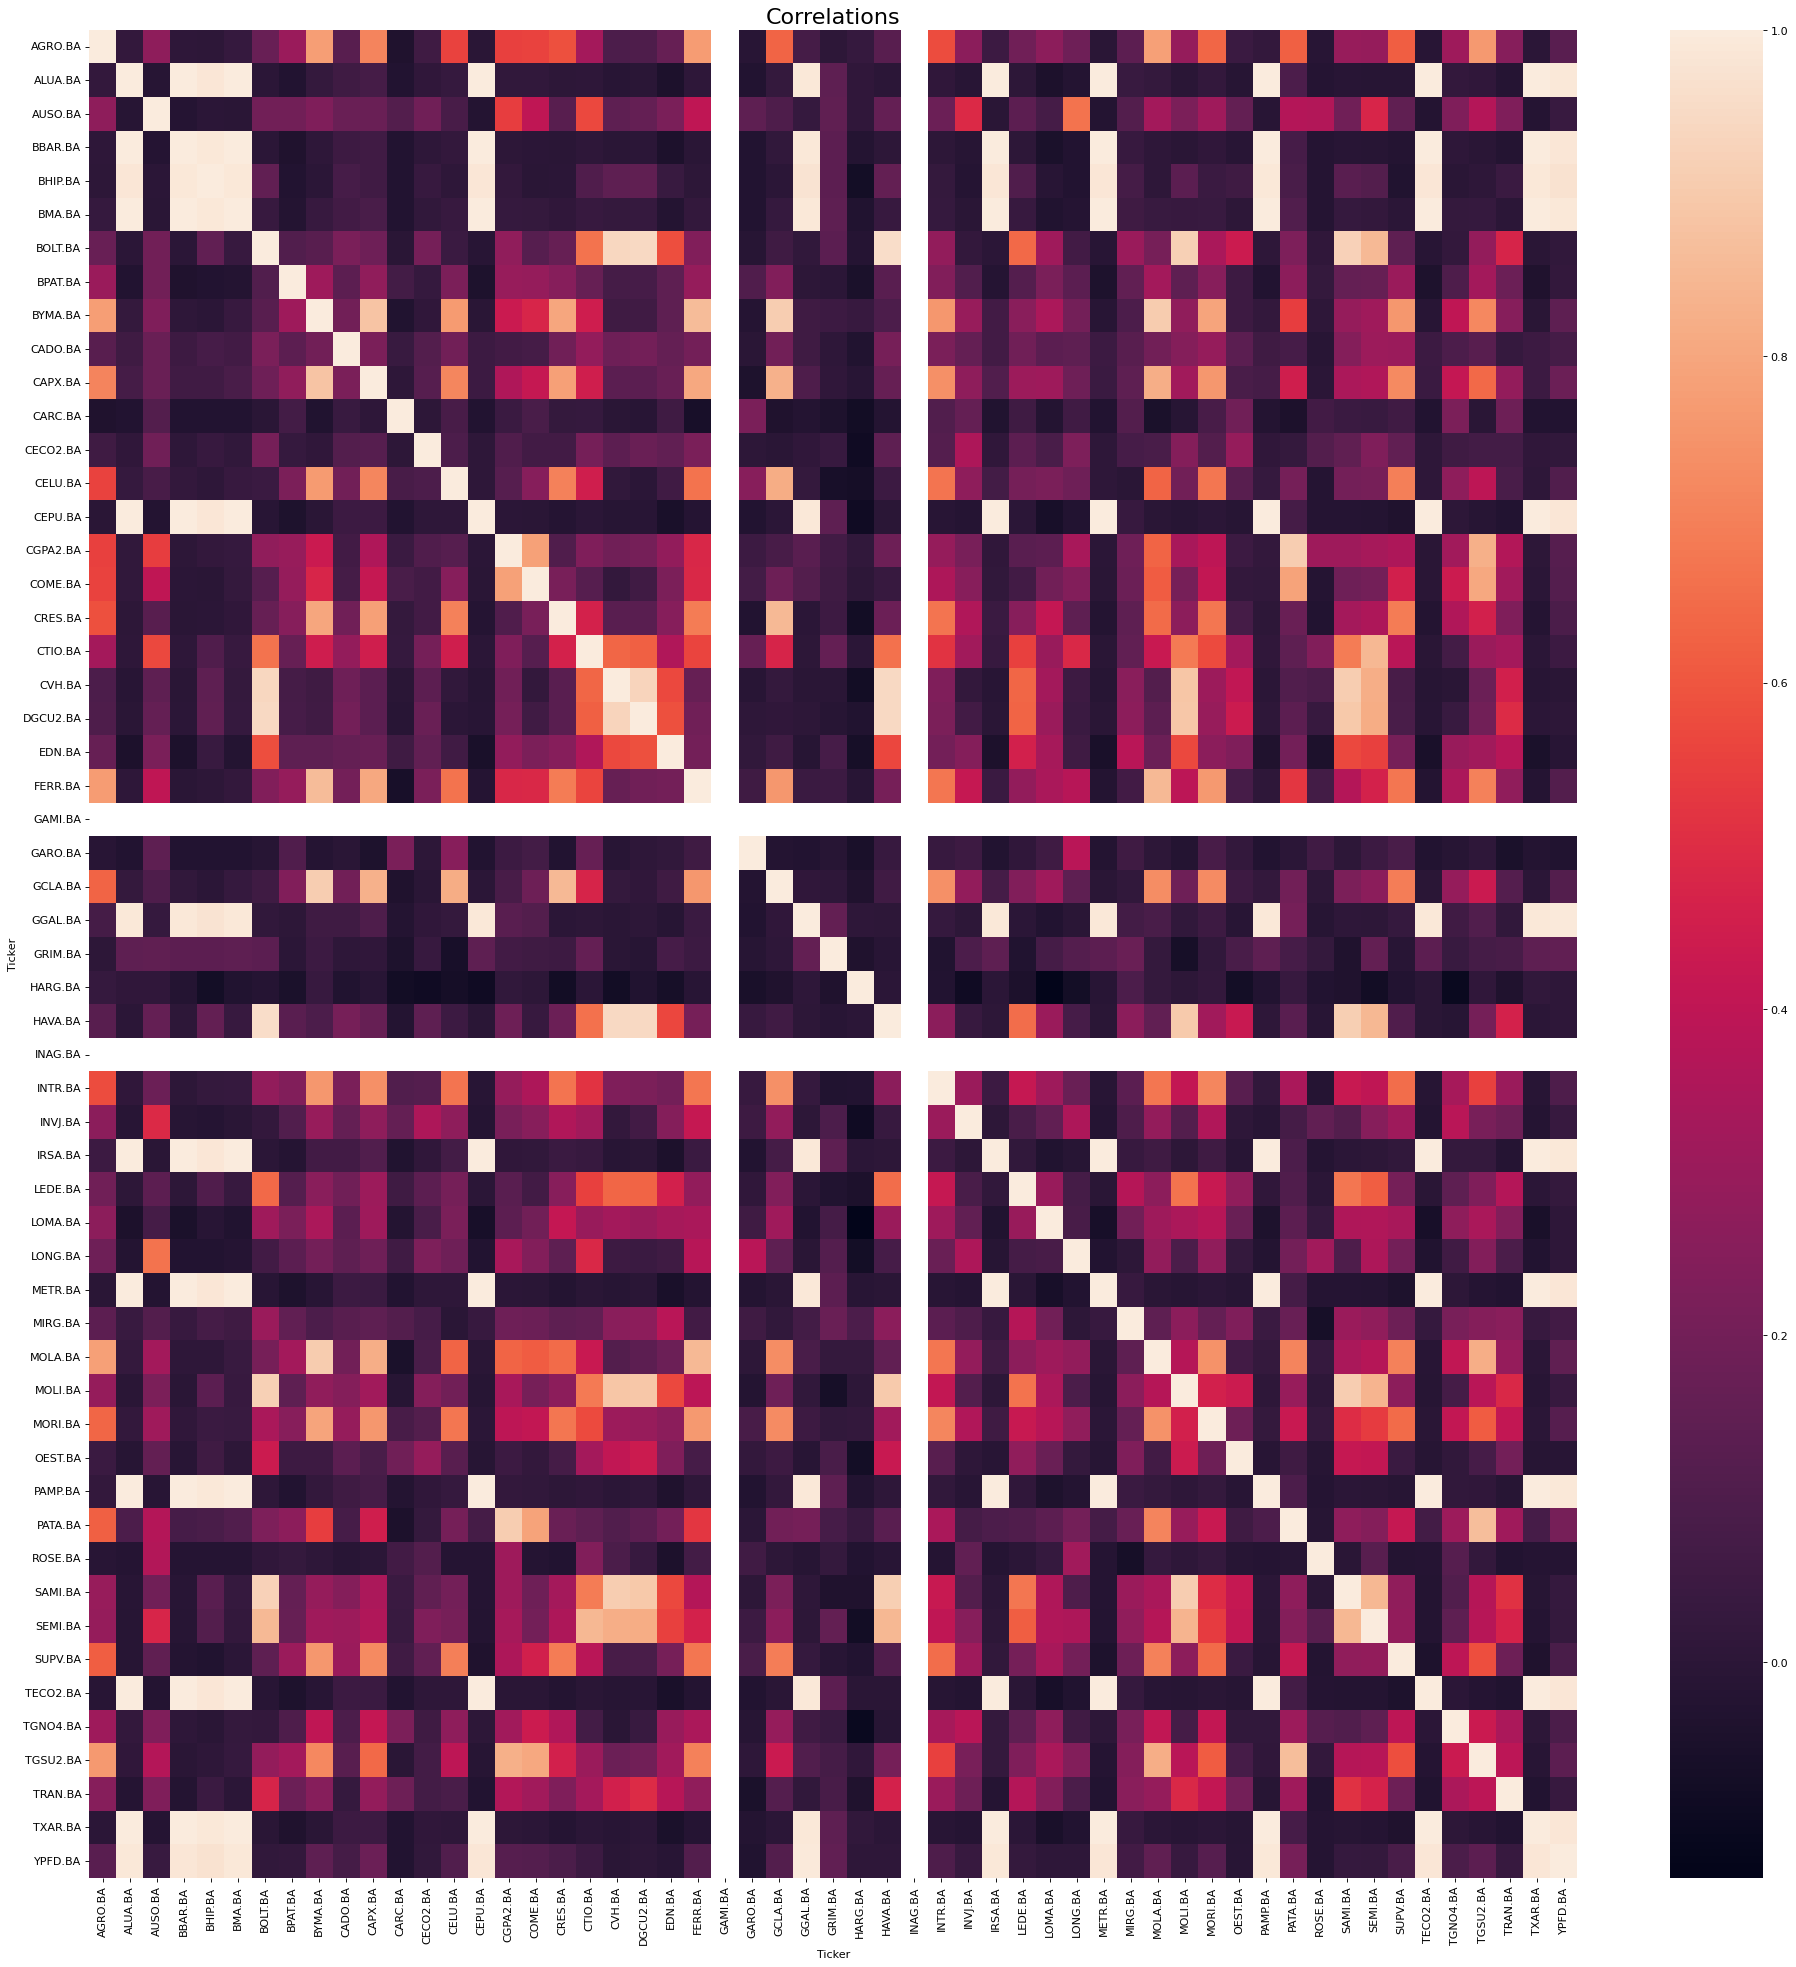

In [71]:
#Volume change correlation matrix
market_volume_corr = market_volume.pct_change().corr() 

plt.figure(figsize=(30, 30), dpi=80)
plt.title( "Correlations", fontsize=20)
sns.heatmap(market_volume_corr )

In [72]:
#Checking INAG.BA and GAMI.BA
print(market_volume["INAG.BA"].sum())
print(market_volume["GAMI.BA"].sum())

2.0
1745.0


In [73]:
#INAG.BA and GAMI.BA should be removed and update market_volume_corr 
market_volume.drop(columns=["INAG.BA" , "GAMI.BA"] , inplace=True)
market_volume_corr = market_volume.pct_change().corr() 

C:\Users\PC1\AppData\Local\Temp\ipykernel_9880\2565684349.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_volume_corr = market_volume.pct_change().corr()


## Correlations of stocks in general panel against stocks out of the general panel.

The general panel are the main list of stocks from BYMA , and we want to explore the volume change behavior between both groups.

[Text(277.77777777777777, 0.5, 'General panel'),
 Text(0.5, 109.77777777777776, 'Stocks out of general panel')]

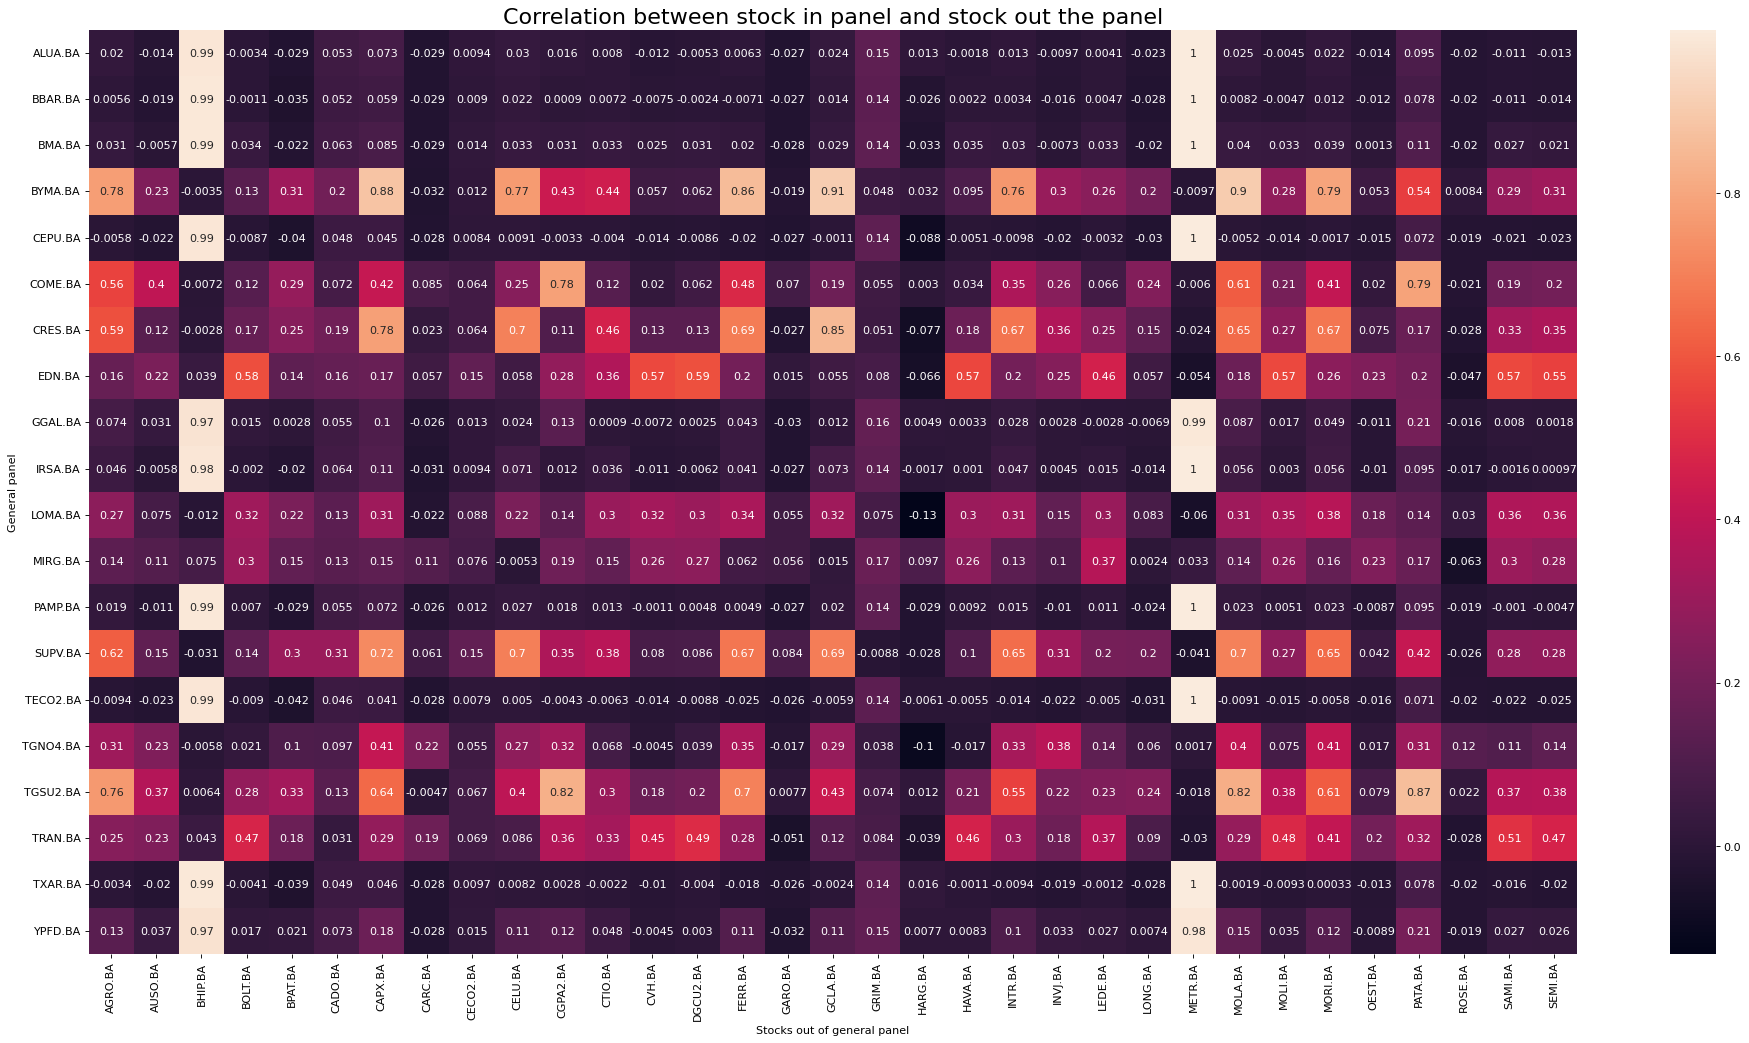

In [74]:

panel_general= ["ALUA.BA", "BBAR.BA" ,"BMA.BA" ,"BYMA.BA", "CEPU.BA" ,"COME.BA", "CRES.BA", 
                "EDN.BA", "GGAL.BA", "IRSA.BA" ,"LOMA.BA", "MIRG.BA", "PAMP.BA" ,"SUPV.BA",
                 "TECO2.BA", "TGNO4.BA" ,"TGSU2.BA" ,"TRAN.BA","TXAR.BA" , "YPFD.BA"]

#Volume change correlation matrix between both groups
corr_with_panel = market_volume_corr.loc[panel_general ,  ~market_volume_corr.columns.isin(panel_general)]

plt.figure(figsize=(30, 15), dpi=80)
plt.title( "Correlation between stock in panel and stock out the panel", fontsize=20)
sns.heatmap(corr_with_panel , annot=True).set(ylabel = "General panel", xlabel="Stocks out of general panel")


In [75]:
#Statistics of General panel in correlation matrix
corr_with_panel.transpose().describe()

Ticker,ALUA.BA,BBAR.BA,BMA.BA,BYMA.BA,CEPU.BA,COME.BA,CRES.BA,EDN.BA,GGAL.BA,IRSA.BA,LOMA.BA,MIRG.BA,PAMP.BA,SUPV.BA,TECO2.BA,TGNO4.BA,TGSU2.BA,TRAN.BA,TXAR.BA,YPFD.BA
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.070487,0.065072,0.083669,0.329636,0.056751,0.223673,0.281615,0.237148,0.088831,0.082317,0.197505,0.148778,0.071911,0.287291,0.057587,0.157573,0.323578,0.239539,0.061897,0.113609
std,0.240608,0.241971,0.237770,0.322998,0.244412,0.224965,0.271802,0.207907,0.236154,0.237886,0.141956,0.102343,0.240397,0.255347,0.243729,0.152368,0.268769,0.176729,0.242699,0.231683
min,-0.029098,-0.035298,-0.033060,-0.032093,-0.087631,-0.021092,-0.076576,-0.065773,-0.029526,-0.030656,-0.132351,-0.063379,-0.029372,-0.040938,-0.041990,-0.103766,-0.018086,-0.051306,-0.038943,-0.031748
25%,-0.012296,-0.014084,0.001338,0.053055,-0.020475,0.061545,0.075210,0.058383,0.001844,-0.005831,0.082517,0.076017,-0.008735,0.084424,-0.021796,0.037926,0.079304,0.086153,-0.018292,0.008263
50%,0.006311,0.000895,0.030647,0.257091,-0.008560,0.185721,0.181022,0.200264,0.013384,0.009417,0.221291,0.143048,0.009174,0.269028,-0.008992,0.108660,0.283796,0.249867,-0.003364,0.034558
75%,0.023849,0.012140,0.035476,0.541608,-0.001063,0.350985,0.464356,0.361557,0.055063,0.056175,0.312863,0.233685,0.023051,0.417493,-0.004288,0.309838,0.432724,0.370073,0.008153,0.120320
max,0.999178,0.999763,0.997641,0.909792,0.999972,0.787954,0.853670,0.588149,0.987741,0.996848,0.380105,0.374095,0.999319,0.723287,0.999975,0.414527,0.866821,0.510074,0.999923,0.983939


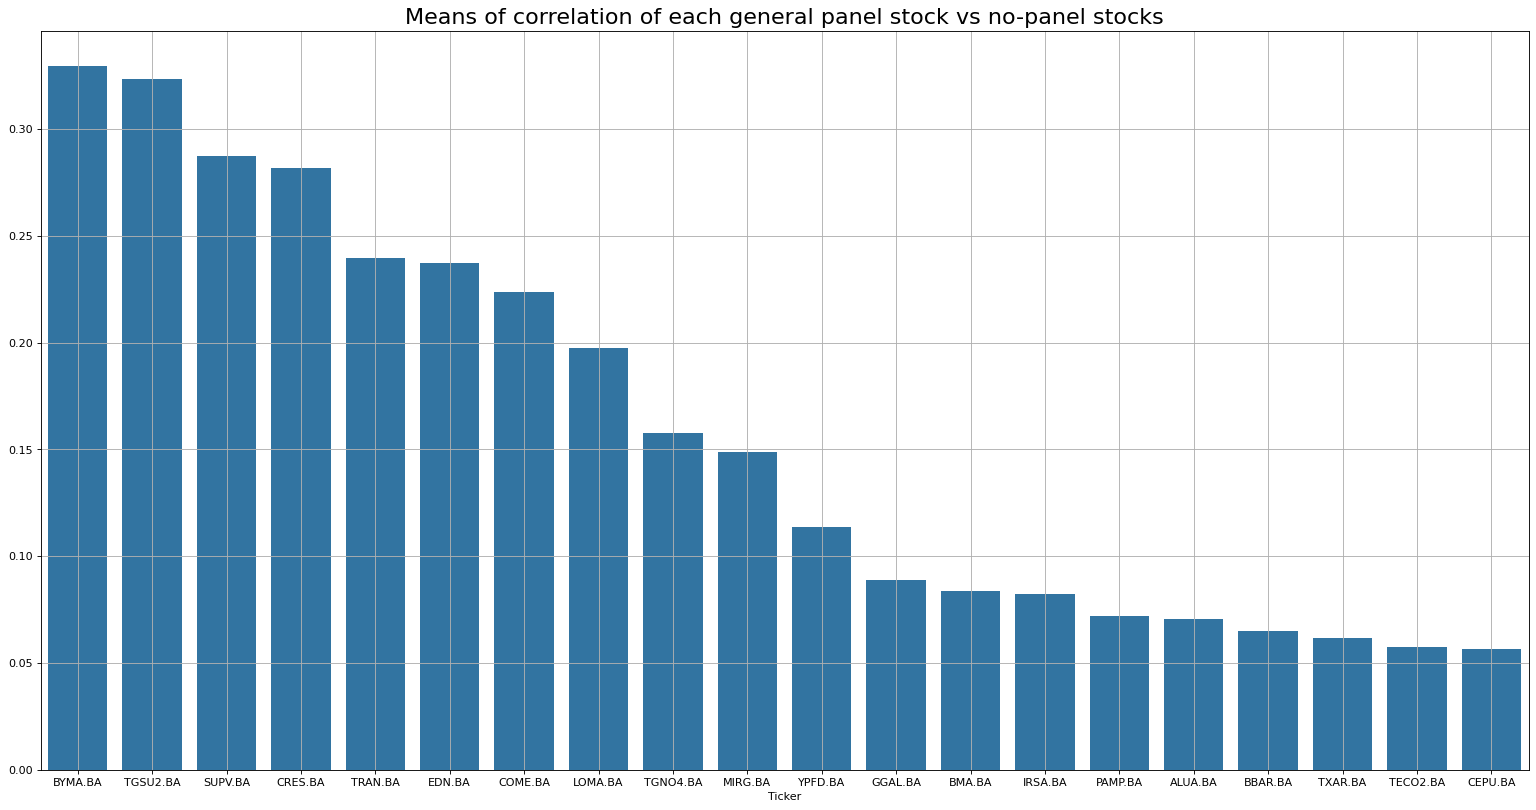

In [76]:
plt.figure(figsize=(24, 12), dpi=80)
plt.title("Means of correlation of each general panel stock vs no-panel stocks" ,fontsize=20)
sns.barplot(corr_with_panel.transpose().mean().sort_values(ascending=False))
plt.grid()

In [77]:
#Statistics of no-panel stocks vs general panel
corr_with_panel.describe()

Ticker,AGRO.BA,AUSO.BA,BHIP.BA,BOLT.BA,BPAT.BA,CADO.BA,CAPX.BA,CARC.BA,CECO2.BA,CELU.BA,...,LONG.BA,METR.BA,MOLA.BA,MOLI.BA,MORI.BA,OEST.BA,PATA.BA,ROSE.BA,SAMI.BA,SEMI.BA
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.237222,0.104847,0.497014,0.129065,0.102268,0.100439,0.279499,0.020378,0.045420,0.188932,...,0.056150,0.487792,0.269501,0.159087,0.253809,0.051234,0.251535,-0.011018,0.164278,0.163817
std,0.271875,0.135524,0.500037,0.175415,0.140852,0.070135,0.273583,0.077055,0.046116,0.253734,...,0.097848,0.522211,0.304468,0.185677,0.267108,0.087997,0.233608,0.037596,0.195163,0.192092
min,-0.009422,-0.022976,-0.031022,-0.008992,-0.041990,0.030541,0.040756,-0.032093,0.007941,-0.005325,...,-0.031139,-0.059835,-0.009105,-0.015147,-0.005791,-0.015646,0.070935,-0.063379,-0.022087,-0.025131
25%,0.019840,-0.012111,-0.002970,-0.001343,-0.029159,0.053084,0.072385,-0.028286,0.009645,0.023456,...,-0.022936,-0.019535,0.024679,0.001146,0.022855,-0.011177,0.095258,-0.022216,-0.003865,-0.006904
50%,0.134380,0.055762,0.522715,0.027321,0.061215,0.067703,0.157269,-0.025851,0.014748,0.064480,...,0.004889,0.508255,0.146843,0.054954,0.141550,0.009369,0.171257,-0.019602,0.068075,0.084594
75%,0.372571,0.223071,0.986254,0.195481,0.228717,0.129573,0.415979,0.057710,0.067855,0.254822,...,0.104262,0.999213,0.456393,0.270684,0.410177,0.076233,0.311814,-0.017241,0.310456,0.324469
max,0.777579,0.398852,0.990286,0.584115,0.326930,0.305390,0.883571,0.224107,0.153069,0.766958,...,0.241518,0.999975,0.904363,0.566578,0.792179,0.233685,0.866821,0.123440,0.570019,0.549072


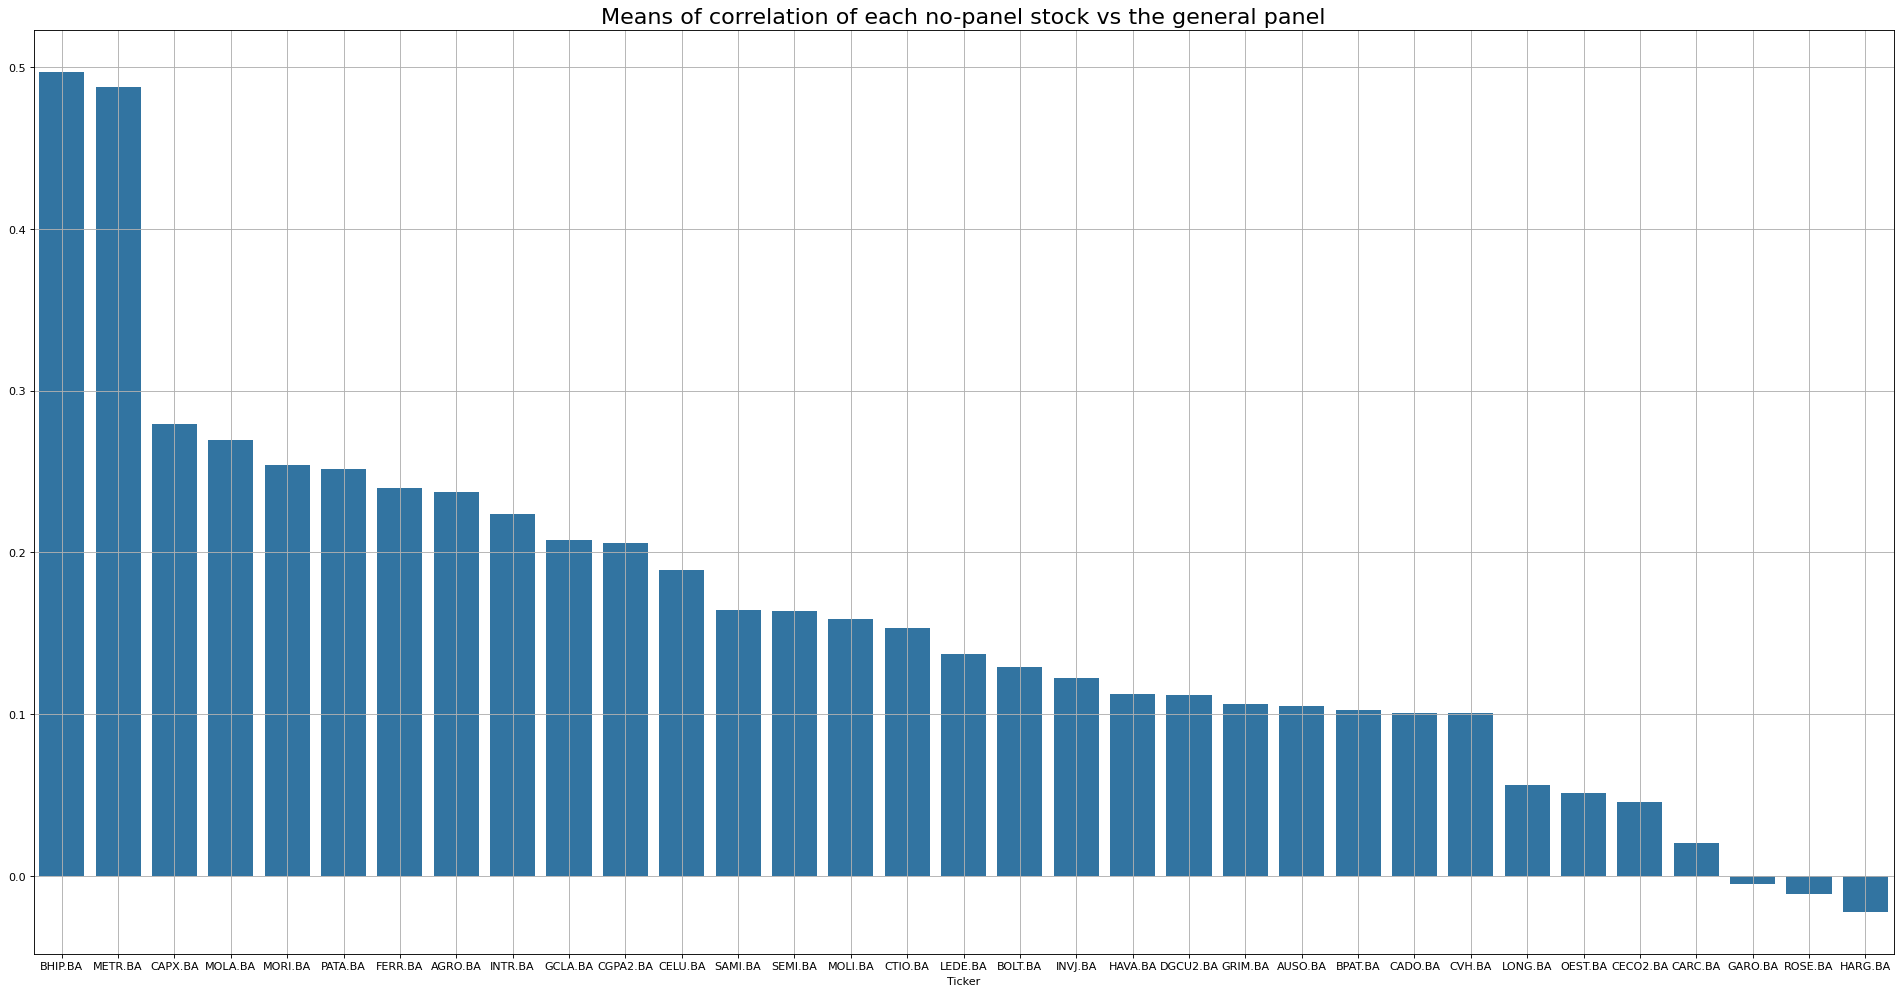

In [78]:
plt.figure(figsize=(30, 15), dpi=80)
plt.title("Means of correlation of each no-panel stock vs the general panel" , fontsize=20)
sns.barplot(corr_with_panel.mean().sort_values(ascending=False))
plt.grid()

## Exploring general panel total volume against no-panel total volume throughout the year

In [79]:
#Dividing market_volume in both groups
panel_volume_d = market_volume[panel_general].transpose().sum()
nonpanel_volume_d= market_volume.loc[:,~(market_volume.columns.isin(panel_general))].transpose().sum()

#Dataframe with total volume per day of both groups
volumes_d = pd.concat([panel_volume_d , nonpanel_volume_d], axis=1)
volumes_d.rename(columns={0 : "Volume general panel" , 1 : "Volume no-panel"} , inplace=True)

volumes_d.head()

,Volume general panel,Volume no-panel
Date,,
2023-09-04,6238216.0,5379263.0
2023-09-05,13375742.0,4458566.0
2023-09-06,11684578.0,3061816.0
2023-09-07,17526808.0,4136028.0
2023-09-08,15674334.0,3458515.0


In [80]:
volumes_d.describe()

,Volume general panel,Volume no-panel
count,2.440000e+02,2.440000e+02
mean,1.668137e+07,8.608290e+06
std,5.644420e+06,4.635044e+06
min,1.247824e+06,4.880510e+05
25%,1.336678e+07,5.377920e+06
50%,1.564941e+07,8.338766e+06
75%,1.955120e+07,1.090284e+07
max,3.807000e+07,3.175415e+07


<Axes: >

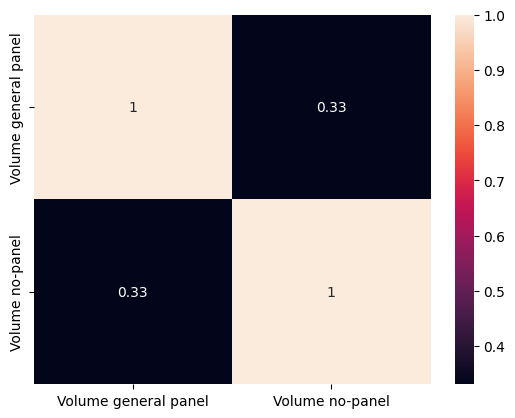

In [81]:
#Correlation between both groups
sns.heatmap(volumes_d.corr() , annot=True)

<Axes: title={'center': 'Volumes throughout the year'}, xlabel='Date'>

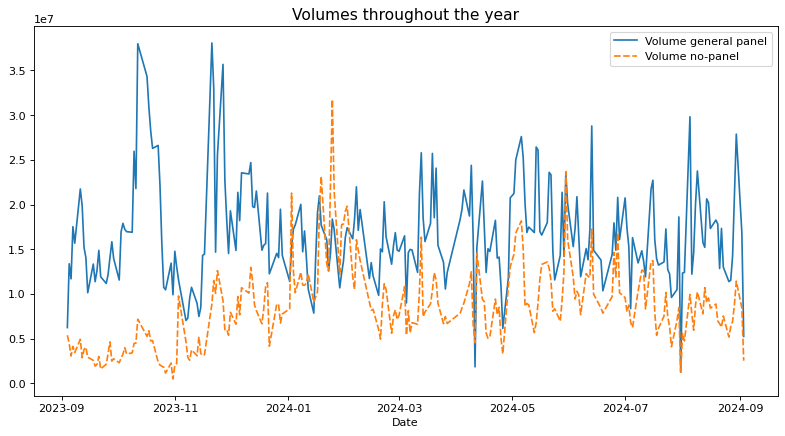

In [82]:
plt.figure(figsize=(12, 6), dpi=80)
plt.title( "Volumes throughout the year", fontsize=14)
sns.lineplot(volumes_d)

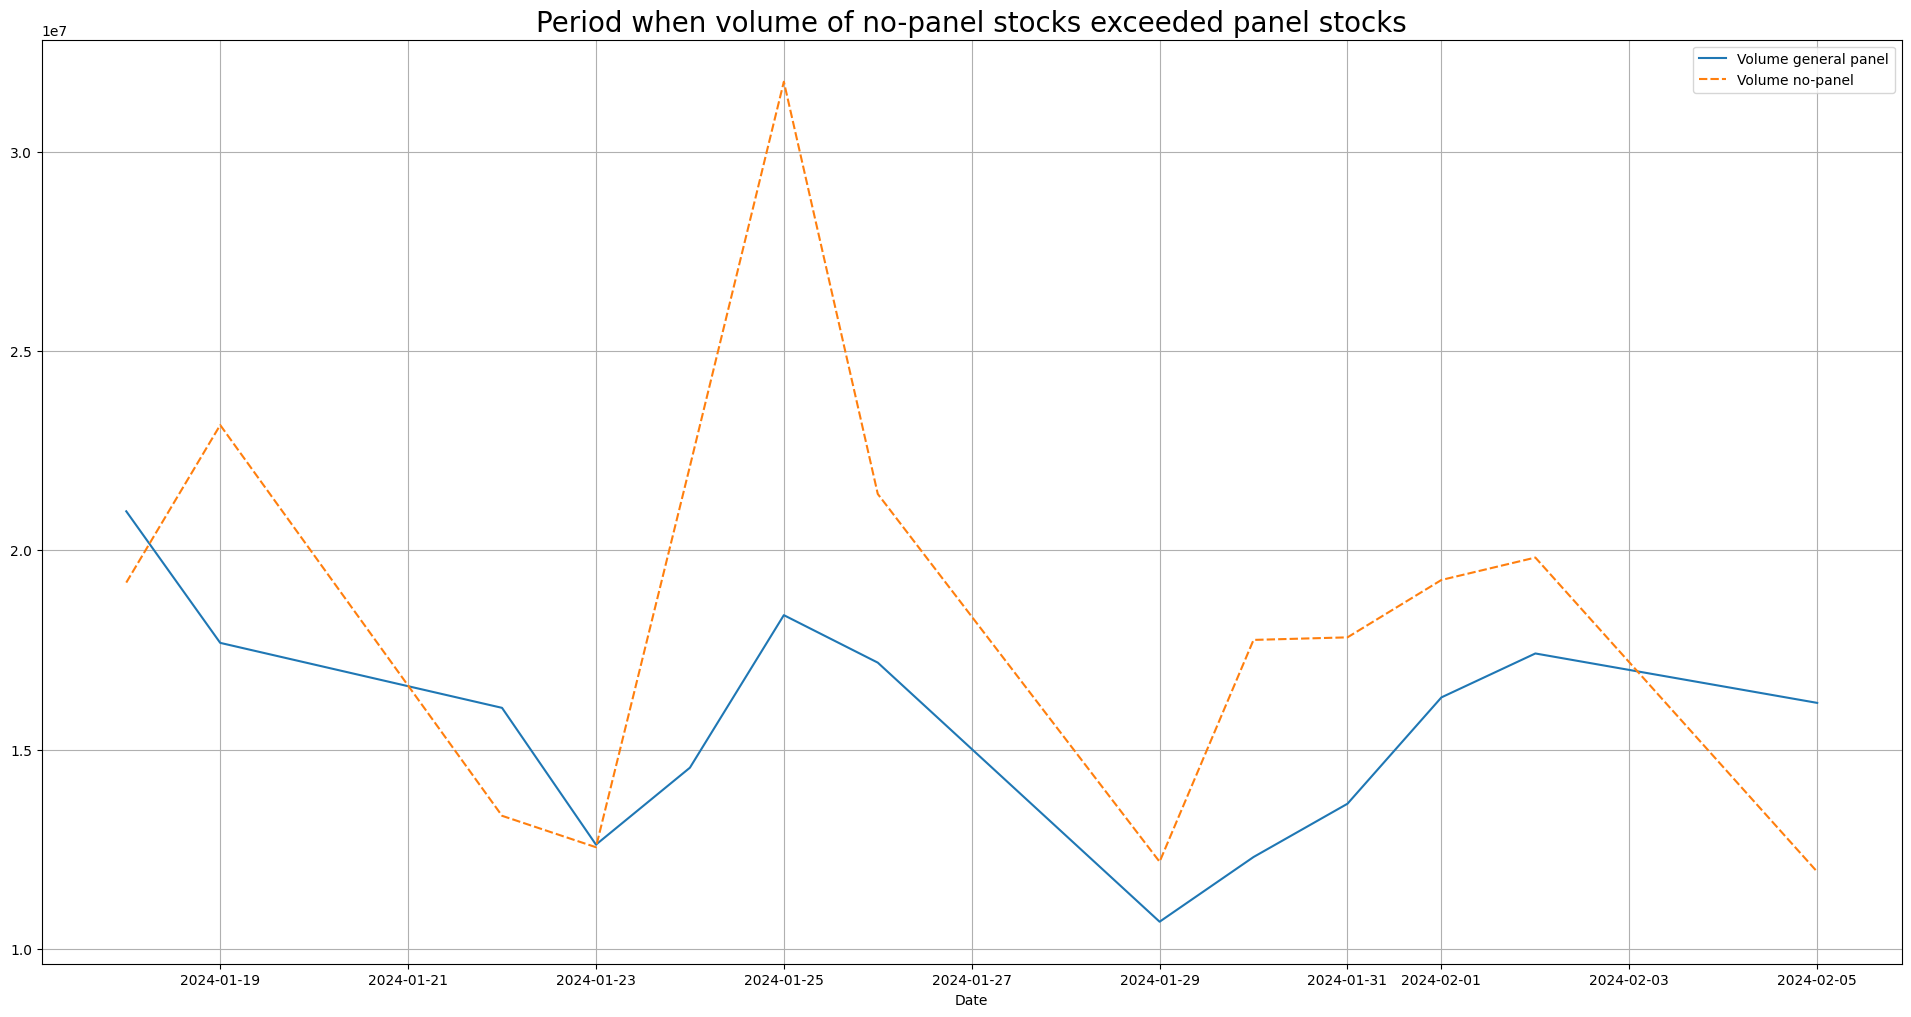

In [83]:
plt.figure(figsize=(24,12))
plt.title("Period when volume of no-panel stocks exceeded panel stocks" , fontsize=20)
sns.lineplot(volumes_d.loc["2024-01-18" : "2024-02-05"])
plt.grid()

In [84]:
#No-panel stocks along the period.
nopanel_period = market_volume.loc["2024-01-18" : "2024-02-05", ~(market_volume.columns.isin(panel_general))].sum().sort_values(ascending=False) 

#No-panel stocks at the highest pike of the period.
nopanel_at_pike = market_volume.loc["2024-01-25", ~(market_volume.columns.isin(panel_general))].sort_values(ascending=False)

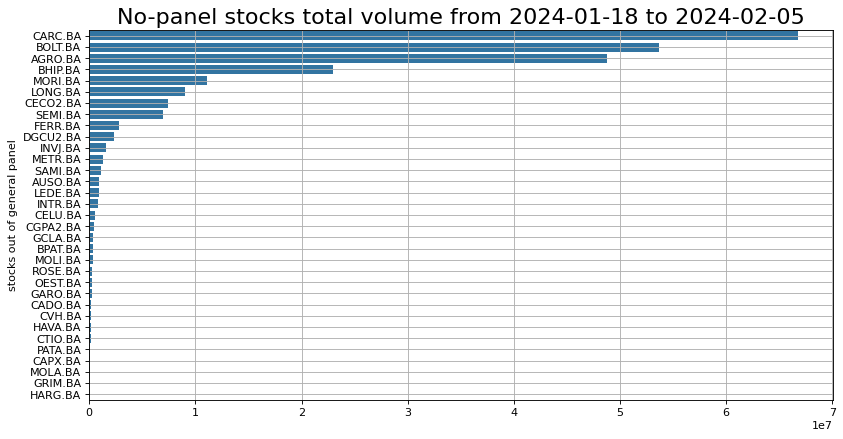

In [85]:
plt.figure(figsize=(12, 6), dpi=80)
plt.title( "No-panel stocks total volume from 2024-01-18 to 2024-02-05", fontsize=20)
sns.barplot(nopanel_period , orient="h").set(ylabel = "stocks out of general panel")
plt.grid()

([<matplotlib.patches.Wedge at 0x1cceb385220>,
 [Text(0.7130178589830132, 0.8376189663392778, 'CARC.BA'),
  Text(-0.8308505106764525, 0.7208934934570281, 'BOLT.BA'),
  Text(-0.8993016031009012, -0.6334482036126942, 'AGRO.BA'),
  Text(-0.02967795282763542, -1.0995995721697789, 'BHIP.BA'),
  Text(0.44274486630589166, -1.006964241351091, 'MORI.BA'),
  Text(0.6869395325959948, -0.8591356578310531, 'LONG.BA'),
  Text(1.0174651529983136, -0.41804863644571094, 'Others')],
 [Text(0.3889188321725526, 0.45688307254869687, '28%'),
  Text(-0.45319118764170135, 0.39321463279474256, '22%'),
  Text(-0.49052814714594606, -0.3455172019705604, '20%'),
  Text(-0.016187974269619317, -0.5997815848198793, '9%'),
  Text(0.2414971998032136, -0.5492532225551405, '5%'),
  Text(0.3746942905069062, -0.46861944972602887, '4%'),
  Text(0.5549809925445347, -0.22802652897038775, '12%')])

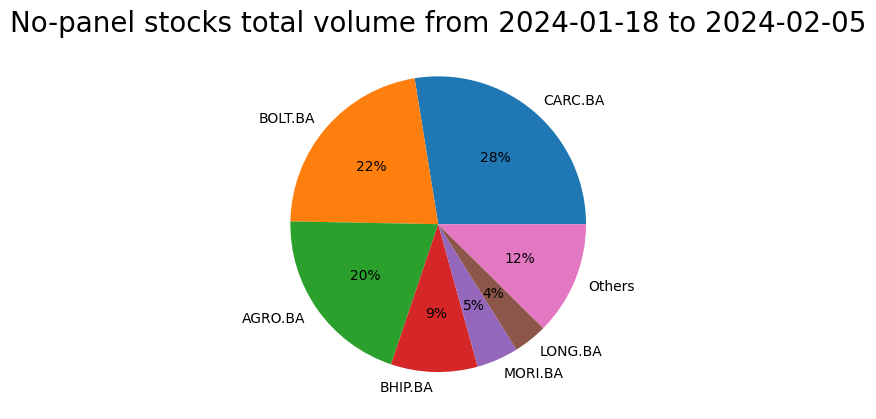

In [86]:
#Pie chart
x = nopanel_period.sort_values(ascending=False).head(6)
y = pd.Series(index=["Others"] , data= [nopanel_period.sort_values(ascending=False).tail(len(nopanel_period)-6).sum()] ).transpose()
data_pie = pd.concat([ x , y] ,axis=0 )

plt.title( "No-panel stocks total volume from 2024-01-18 to 2024-02-05", fontsize=20)
plt.pie(data_pie, labels= data_pie.index , autopct='%.0f%%') 

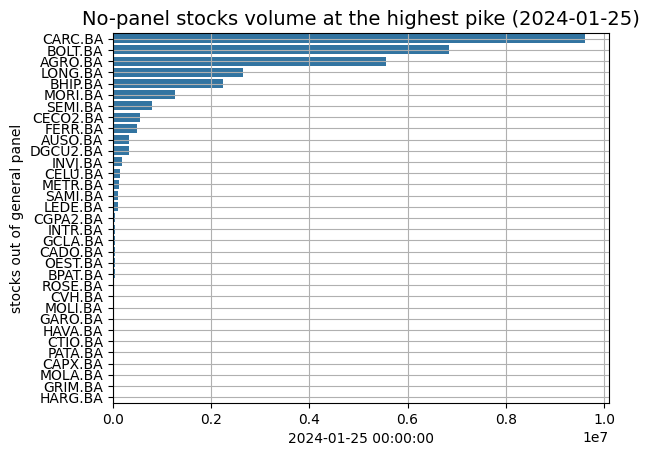

In [87]:
plt.title( "No-panel stocks volume at the highest pike (2024-01-25)", fontsize=14)
sns.barplot(nopanel_at_pike , orient="h" ).set(ylabel = "stocks out of general panel")
plt.grid()

([<matplotlib.patches.Wedge at 0x1cce218ce00>,
 [Text(0.6384173073810482, 0.8957808558103552, 'CARC.BA'),
  Text(-0.9314797787269427, 0.5851029155822128, 'BOLT.BA'),
  Text(-0.8638598010040766, -0.6809891659998691, 'AGRO.BA'),
  Text(-0.09862972385277377, -1.0955693394636077, 'LONG.BA'),
  Text(0.4219698338078096, -1.0158451945824274, 'BHIP.BA'),
  Text(0.7418962493303222, -0.8121514361432852, 'MORI.BA'),
  Text(1.0323644135359697, -0.3797679787245543, 'Others')],
 [Text(0.3482276222078444, 0.4886077395329209, '30%'),
  Text(-0.508079879305605, 0.31914704486302514, '22%'),
  Text(-0.4711962550931326, -0.37144863599992856, '18%'),
  Text(-0.053798031192422054, -0.5975832760710587, '8%'),
  Text(0.23016536389516884, -0.5540973788631421, '7%'),
  Text(0.40467068145290297, -0.4429916924417919, '4%'),
  Text(0.5631078619287107, -0.20714617021339324, '11%')])

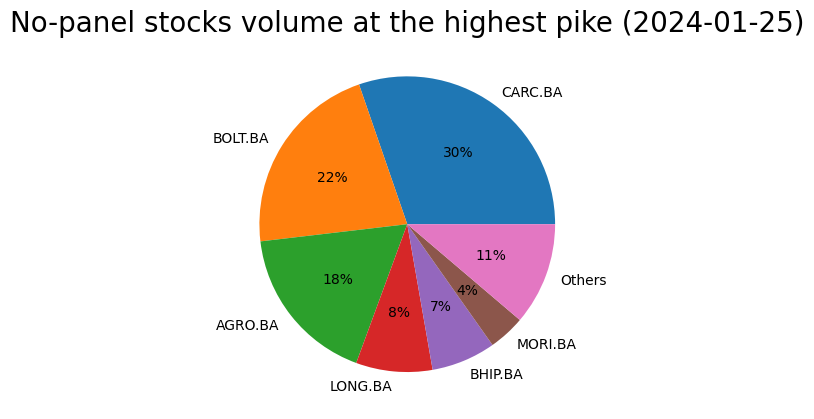

In [88]:
#Pie chart
x = nopanel_at_pike.sort_values(ascending=False).head(6)
y = pd.Series(index=["Others"] , data= [nopanel_at_pike.sort_values(ascending=False).tail(len(nopanel_at_pike)-6).sum()] ).transpose()
data_pie = pd.concat([ x , y] ,axis=0 )

plt.title( "No-panel stocks volume at the highest pike (2024-01-25)", fontsize=20)
plt.pie(data_pie, labels= data_pie.index , autopct='%.0f%%') 

Two stocks could have the same volume but their price could go in oposit directions and this could be a clue of capital flow from one group of stocks to another. Now we´ll be checking whether this is the case at the period where stocks out of the general panel were over the general panel looking at the price changes


In [89]:
#Price change for both groups.
general_panel_close = market_df.Close[panel_general].pct_change()
nopanel_close = market_df.Close[nopanel_at_pike.index].pct_change()

#Price change along period for both groups.
general_panel_close_period = general_panel_close.loc["2024-01-18" : "2024-02-05" , :]
nopanel_close_period= nopanel_close.loc["2024-01-18" : "2024-02-05" , :]

#Price change at the highest pike of the period for both groups.
general_panel_close_pike = general_panel_close.loc["2024-01-25" , :]
nopanel_close_pike= nopanel_close.loc["2024-01-25" , :]

C:\Users\PC1\AppData\Local\Temp\ipykernel_9880\984885593.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  nopanel_close = market_df.Close[nopanel_at_pike.index].pct_change()


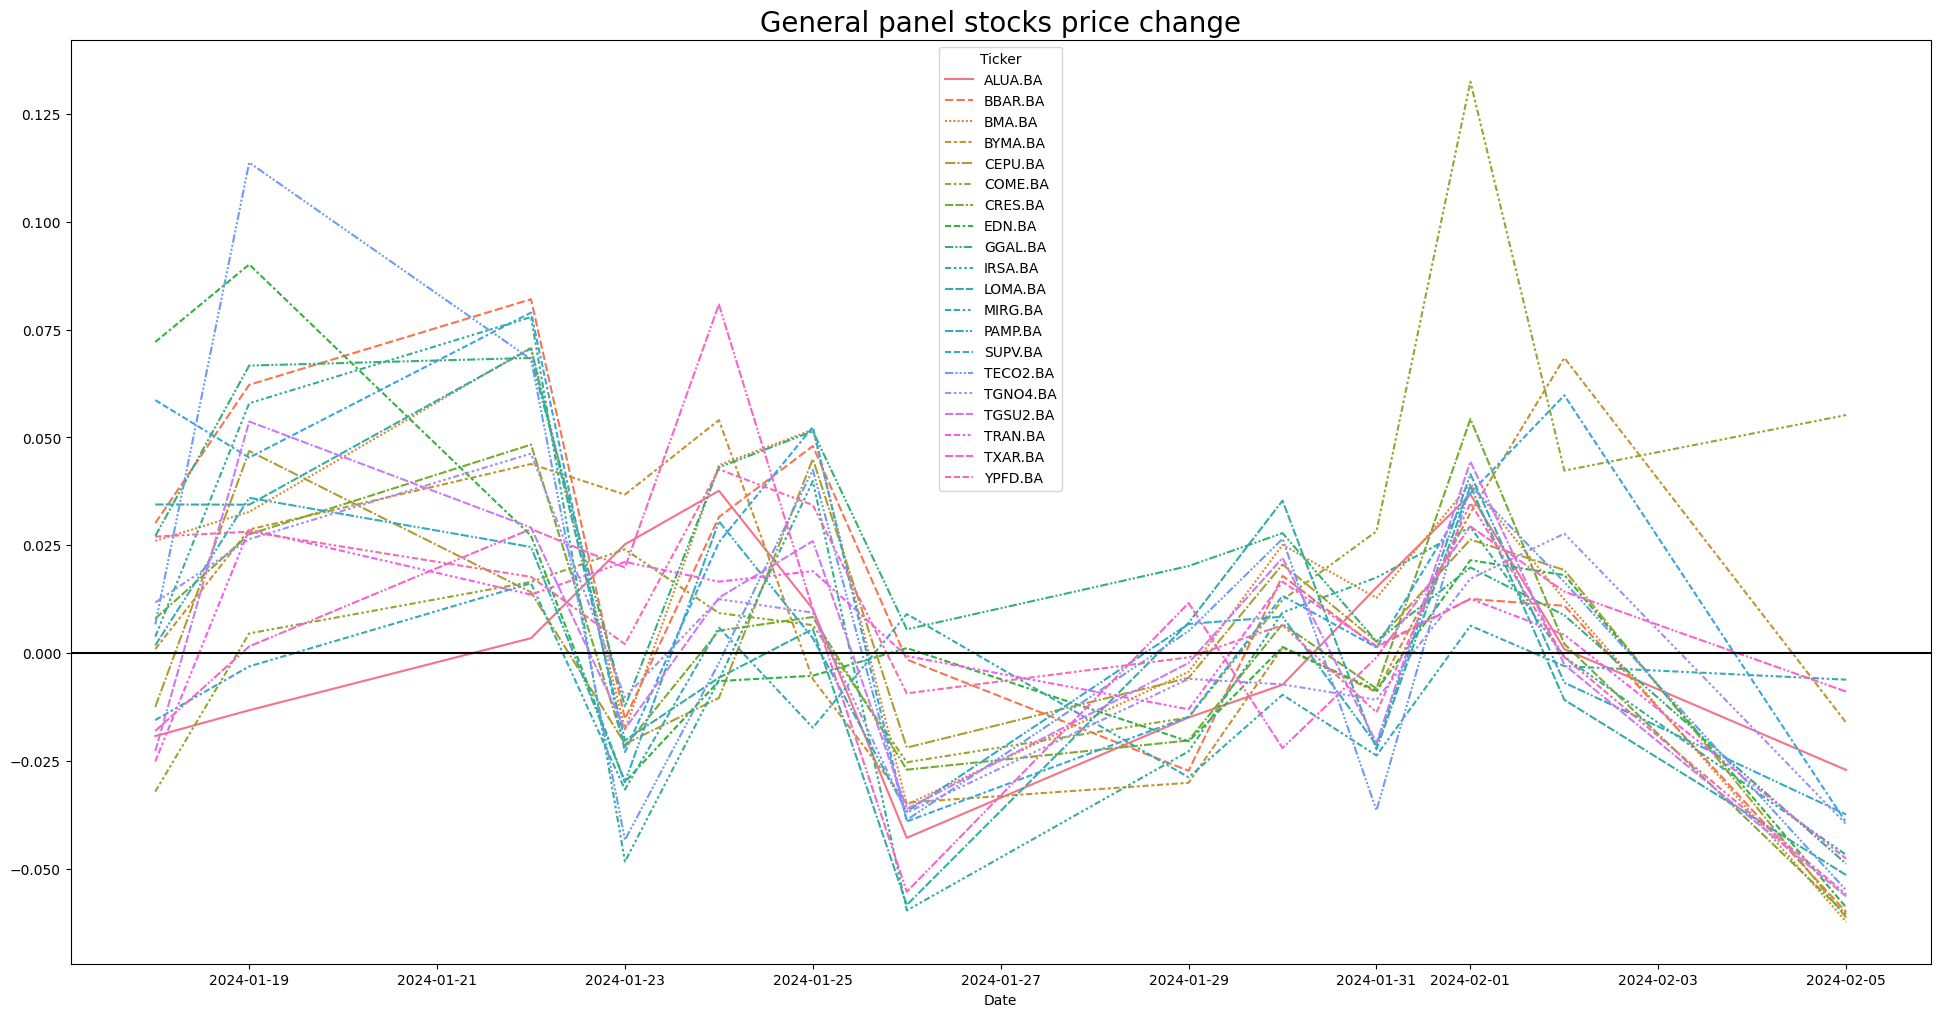

In [90]:
plt.figure(figsize=(24,12))
plt.title( "General panel stocks price change", fontsize=20)
sns.lineplot(general_panel_close_period)
plt.axhline( y =0 , color= "k")

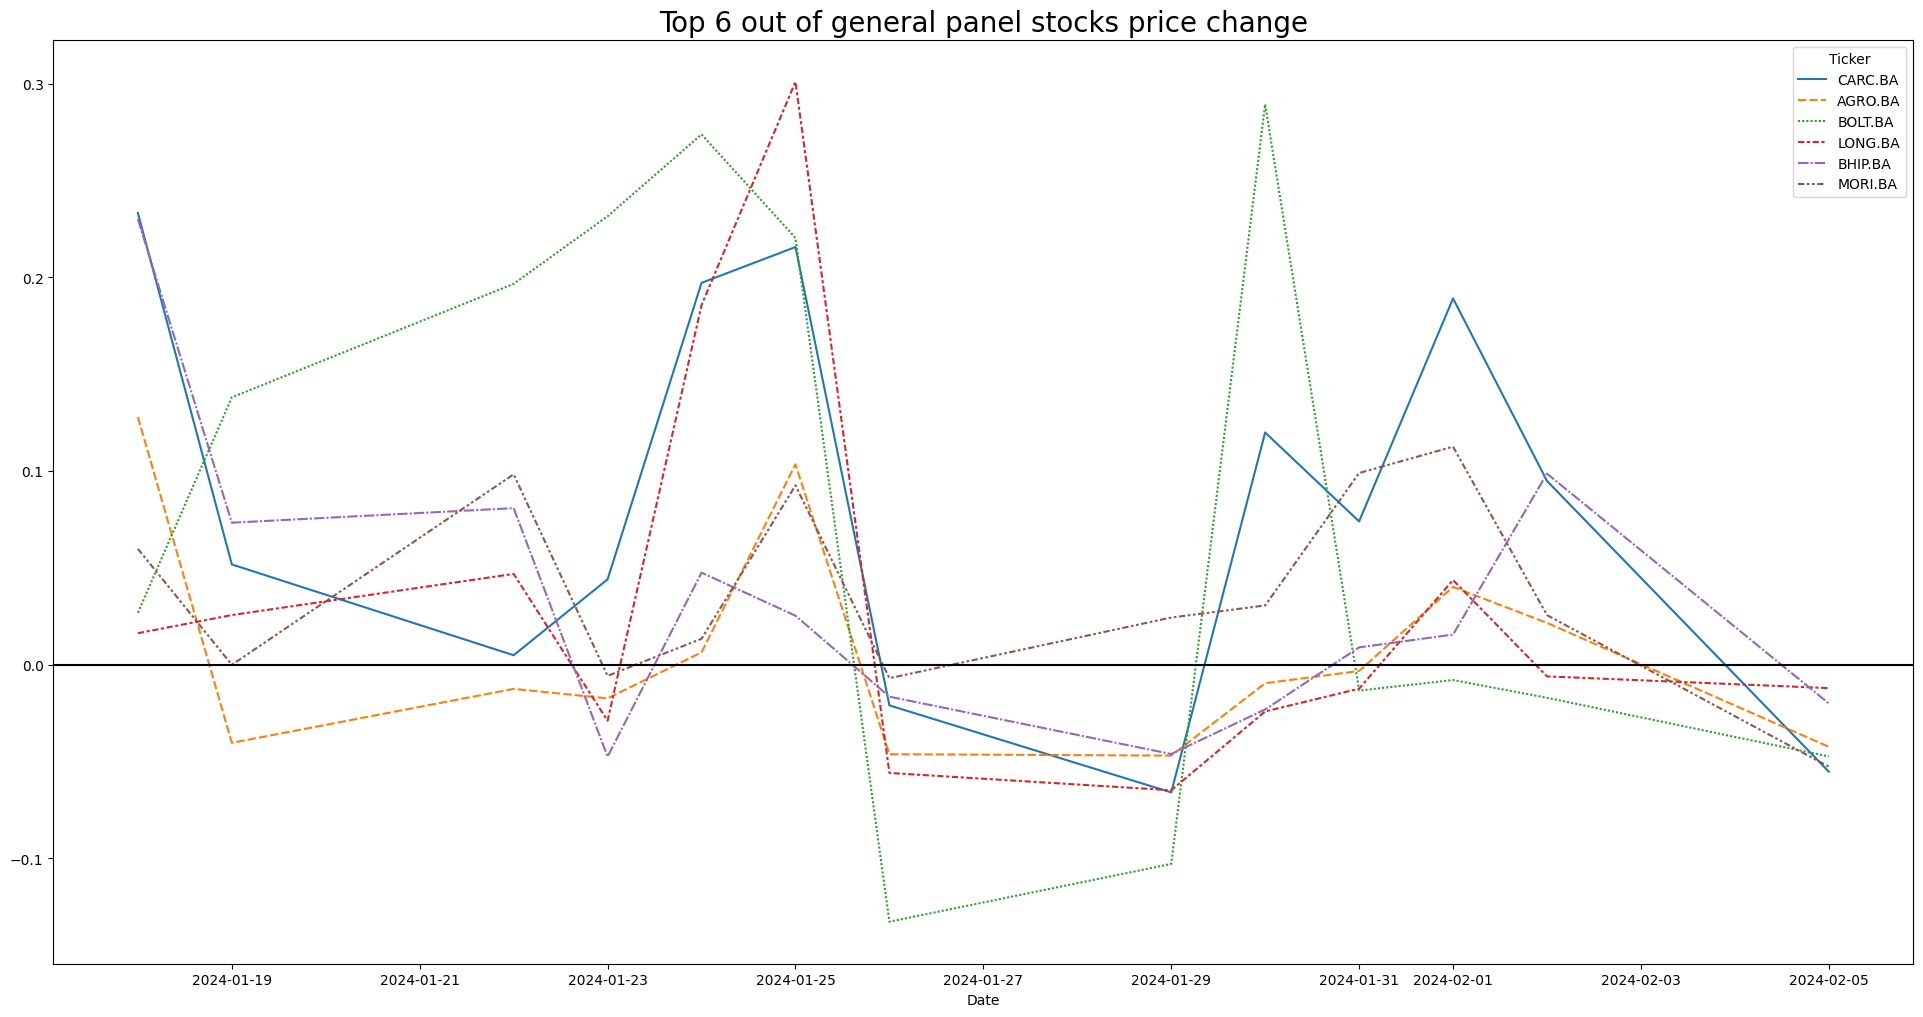

In [91]:
plt.figure(figsize=(24,12))
plt.title( "Top 6 out of general panel stocks price change", fontsize=20)
sns.lineplot(nopanel_close_period.loc[: , ["CARC.BA" ,"AGRO.BA" ,"BOLT.BA" ,"LONG.BA" , "BHIP.BA","MORI.BA"]])
plt.axhline( y =0 , color= "k")

<Axes: title={'center': 'Correlation of price change (2024-01-18 - 2024-02-05)'}, xlabel='Ticker', ylabel='Ticker'>

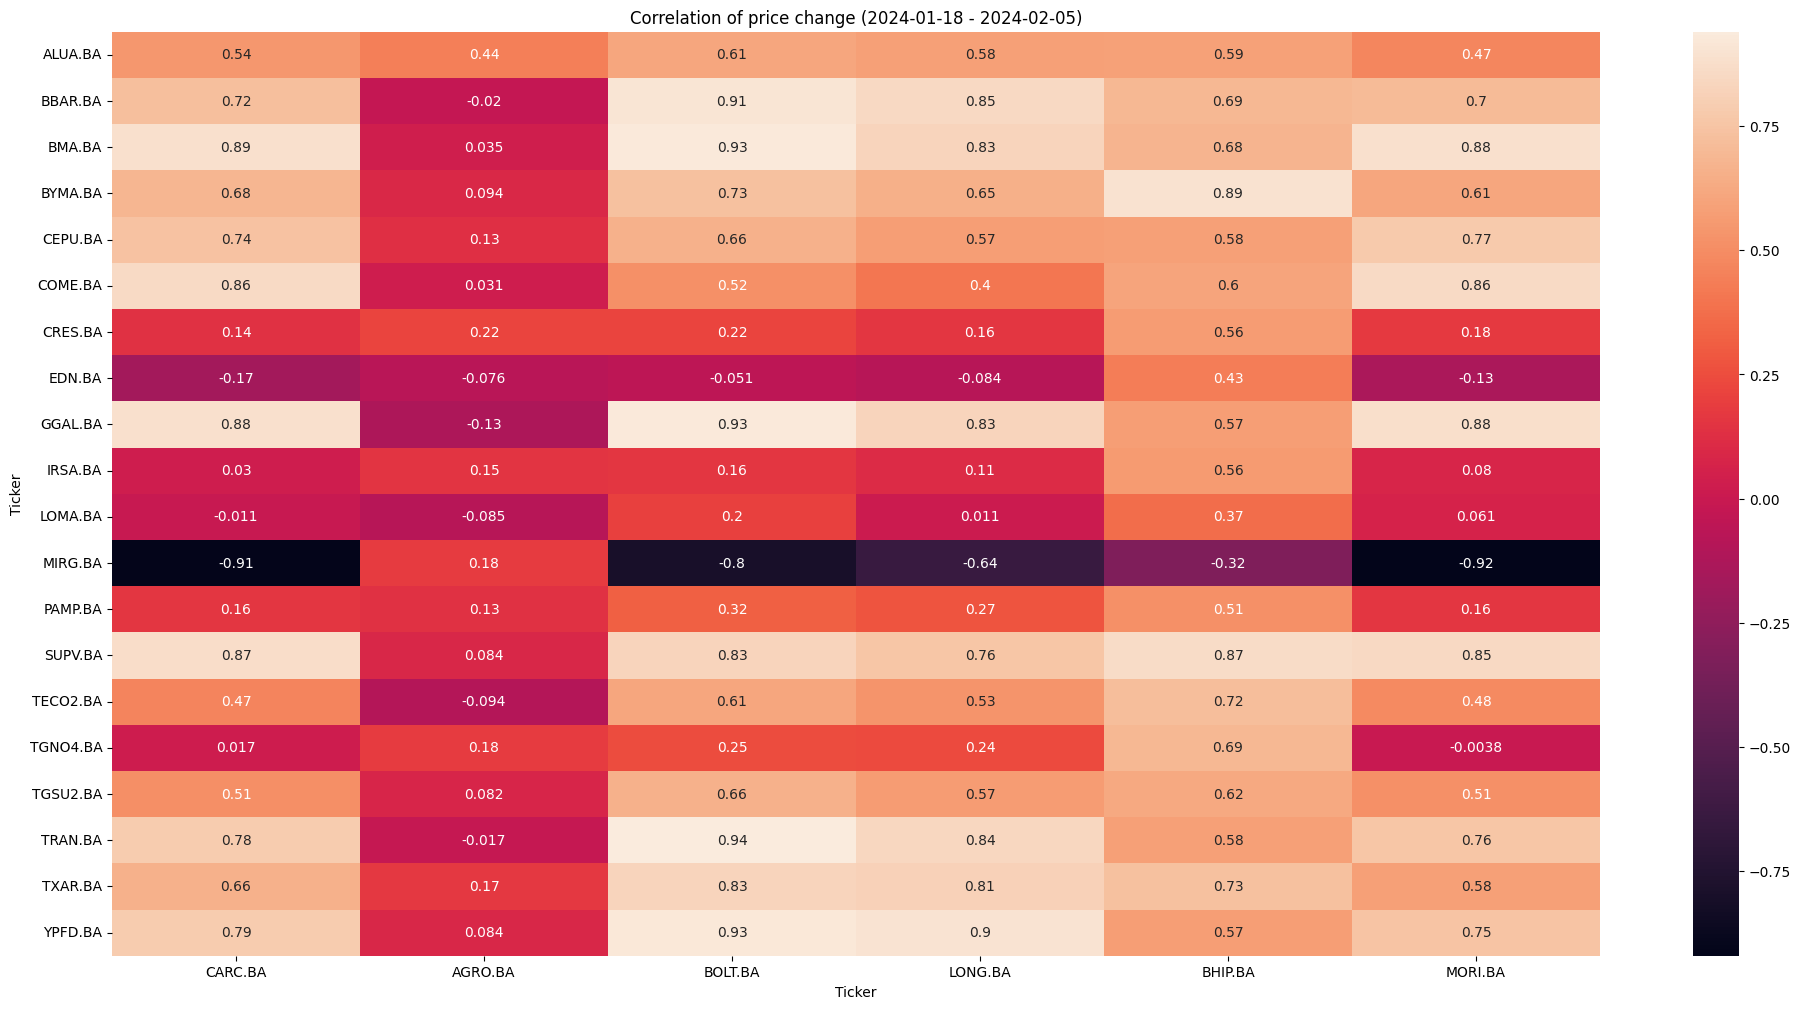

In [92]:
z = panel_general + list(nopanel_at_pike.index)
market_corr = market_df.Close.loc["2024-01-18" : "2024-02-05", z].corr().loc[panel_general , ["CARC.BA" ,"AGRO.BA" ,"BOLT.BA" ,"LONG.BA" , "BHIP.BA","MORI.BA"]]
plt.figure(figsize=(24,12))
plt.title("Correlation of price change (2024-01-18 - 2024-02-05)")
sns.heatmap(market_corr , annot=True)

Overall we can see that there is a positive correlation on price change and volume change as we saw earlier. So we can discard the hipotesis of capital flow from one group of stock to another.

<Axes: title={'center': 'Price change correlation throughout the year'}, xlabel='Ticker', ylabel='Ticker'>

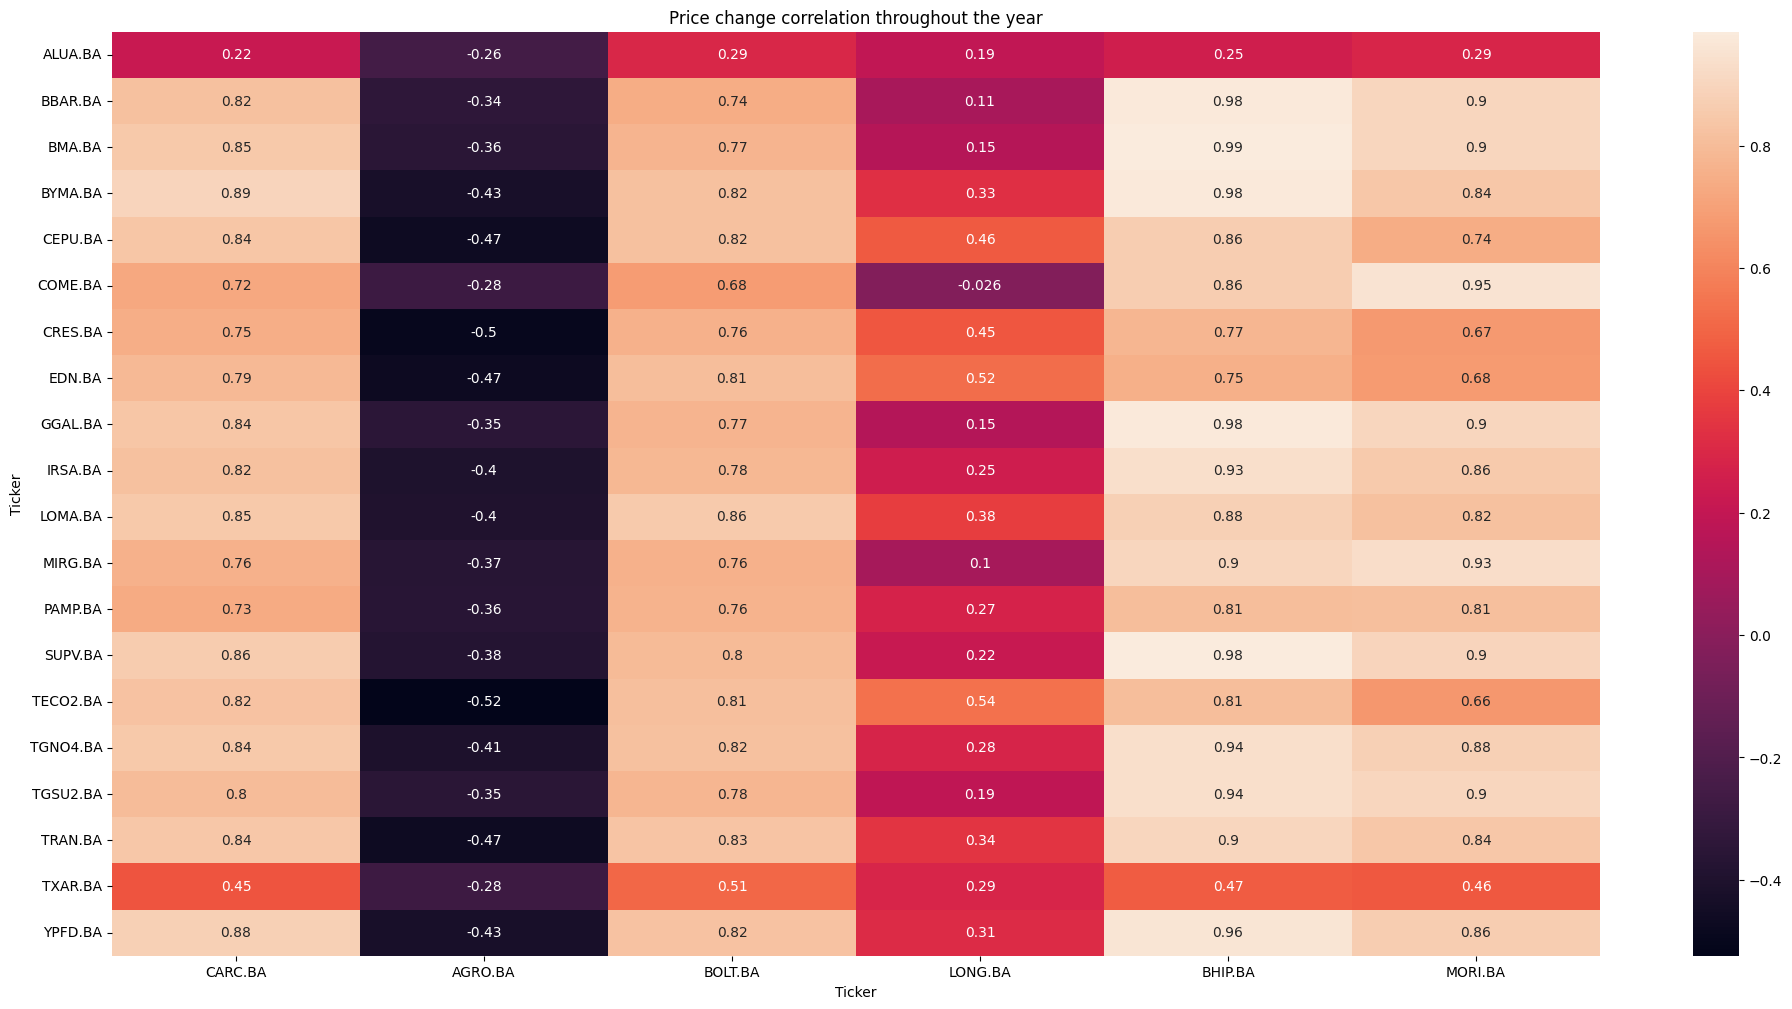

In [93]:
z = panel_general + list(nopanel_at_pike.index)
market_corr_y = market_df.Close.loc[:, z].corr().loc[panel_general , ["CARC.BA" ,"AGRO.BA" ,"BOLT.BA" ,"LONG.BA" , "BHIP.BA","MORI.BA"]]
plt.figure(figsize=(24,12))
plt.title("Price change correlation throughout the year")
sns.heatmap(market_corr_y , annot=True)

<Axes: title={'center': 'Mean correlation difference between year and period'}, xlabel='Ticker'>

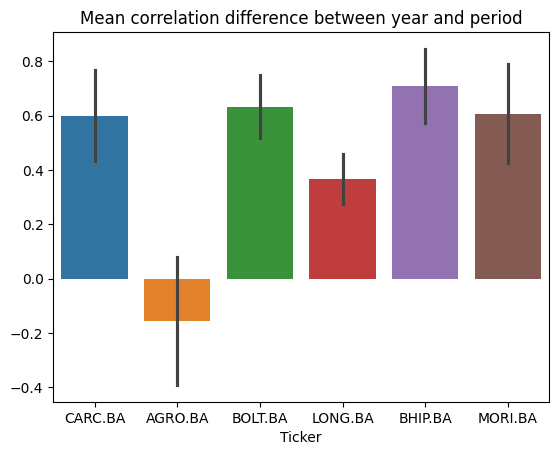

In [94]:
diff_corr = pd.DataFrame({"Year" : market_corr_y.mean() , "Period" :market_corr.mean()})
plt.title("Mean correlation difference between year and period")
sns.barplot(diff_corr.transpose() )

## Observations 

<ul>
<li>Volumes in general have a neutral to positive correlation</li>
<li>Price changes generally have a neutral to positive correlation</li>
<li>There was a period from 2024-01-18 to 2024-02-05 were volume of stocks outside the general panel exceeded the general panel</li>
<li>The increase in volume at 2024-01-18 to 2024-02-05 of no-panel stocks, were mainly due to CARC , AGRO, BOLT, LONG. BHIP , MORI</li>
<li>AGRO at 2024-01-18 to 2024-02-05 had a neutral to positve correlation with the general panel unlike to the negative correlation throughou the year</li>
<li>The higest pike at 2024-01-25 in change of volume and price were followed by a profit-taking</li>
<li>Given the correlation of price changes in general there is no evidence of capital flow from one group to another</li>
<li>Correlation Matrices shows interesting relationships between groups of stock for further study</li>
</ul>
